## Prerequisites


In [1]:
import dotenv

dotenv.load_dotenv()

True

In [2]:
project_names = [
    "gender_female",
    "gender_male",
    "language_de",
    "language_en",
    "language_es",
    "language_fr",
    "language_it",
    "language_ja",
    "language_pt",
]
encoder_ids = [
    ("mert_v1_95m", 768),
    ("whisper_large_v2", 1280),
    ("muq_large_msd", 1024),
    ("muq_mulan_large", 512),
]


## 1. Create CAVs using LogisticRegression for Significance Test


In [3]:
# training meta parameters
num_train_runs = 10
training_sample_frac = 0.25

epochs = 10000
learning_rate = 0.004
dropout_rate = 0.0

### Prepare Data


In [4]:
import itertools
import os
import sys

import s3fs
from cavmir.utils import (
    create_in_memory_dataloader,
    lda_one_cav,
    load_df_and_embeddings,
    store_cav_vector_array,
    store_evaluation_metrics,
    train_one_cav,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


### Training


In [ ]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    test_dataloader = create_in_memory_dataloader(df_test)

    training_sample_size = int(len(df) * training_sample_frac)
    print(f"Training sample size: {training_sample_size}")

    cav_vectors = []
    evaluation_metrics = []
    biases = []

    for i in range(num_train_runs):
        sys.stdout.write(f"\rIteration {i + 1}/{num_train_runs}")

        cav_vector, bias, evaluation_metric = train_one_cav(
            random_state=i,
            df=df,
            project_name=project_name,
            training_sample_count=training_sample_size,
            validation_sample_count=4,
            learning_rate=learning_rate,
            epochs=epochs,
            dropout_rate=dropout_rate,
            embedding_dim=embedding_dim,
            df_test=df_test,
            plot_evaluation=False,
            verbose_steps=1e9,
        )

        cav_vectors.append(cav_vector)
        evaluation_metrics.append(evaluation_metric)
        biases.append(bias)

    store_cav_vector_array(
        cav_vectors, f"cav_ttest_{project_name}.npy", encoder_id, project_name
    )
    store_cav_vector_array(
        biases, f"cav_bias_ttest_{project_name}.npy", encoder_id, project_name
    )
    store_evaluation_metrics(
        evaluation_metrics,
        f"evaluation_metrics_ttest_{project_name}.json",
        encoder_id,
        project_name,
    )



Fitting project: gender_female for encoder: mert_v1_95m
Training sample size: 2568
Iteration 1/10Early stopping at epoch 969
Loss history saved to trainings/gender_female/loss_history.json
Iteration 2/10Early stopping at epoch 34
Loss history saved to trainings/gender_female/loss_history.json
Iteration 3/10Early stopping at epoch 2015
Loss history saved to trainings/gender_female/loss_history.json
Iteration 4/10Early stopping at epoch 813
Loss history saved to trainings/gender_female/loss_history.json
Iteration 5/10Early stopping at epoch 4194
Loss history saved to trainings/gender_female/loss_history.json
Iteration 6/10Early stopping at epoch 4465
Loss history saved to trainings/gender_female/loss_history.json
Iteration 7/10Early stopping at epoch 30
Loss history saved to trainings/gender_female/loss_history.json
Iteration 8/10Early stopping at epoch 2898
Loss history saved to trainings/gender_female/loss_history.json
Iteration 9/10Early stopping at epoch 24
Loss history saved to tra

KeyboardInterrupt: 

## 2. Train CAV for Qualitative Tests


In [6]:
train_val_split = 0.9

# training parameters
epochs = 10000
learning_rate = 0.004
dropout_rate = 0.0

### Prepare Data


In [9]:
import itertools
import os

import s3fs
from cavmir.utils import (
    store_cav_vector_array,
    store_evaluation_metrics,
    train_one_cav,
    lda_one_cav,
    load_df_and_embeddings,
    create_in_memory_dataloader,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


### Training



Fitting project: gender_female for encoder: mert_v1_95m
Training sample size: 9246
Validation sample size: 1028
Test sample size: 3156
Epoch 1/10000
Epoch 1 Train Loss: 0.7003
Epoch 1 Validation Loss: 0.6887
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4178
Epoch 101 Validation Loss: 0.4066
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3629
Epoch 201 Validation Loss: 0.3528
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3384
Epoch 301 Validation Loss: 0.3304
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.3241
Epoch 401 Validation Loss: 0.3185
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.3143
Epoch 501 Validation Loss: 0.3112
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.3069
Epoch 601 Validation Loss: 

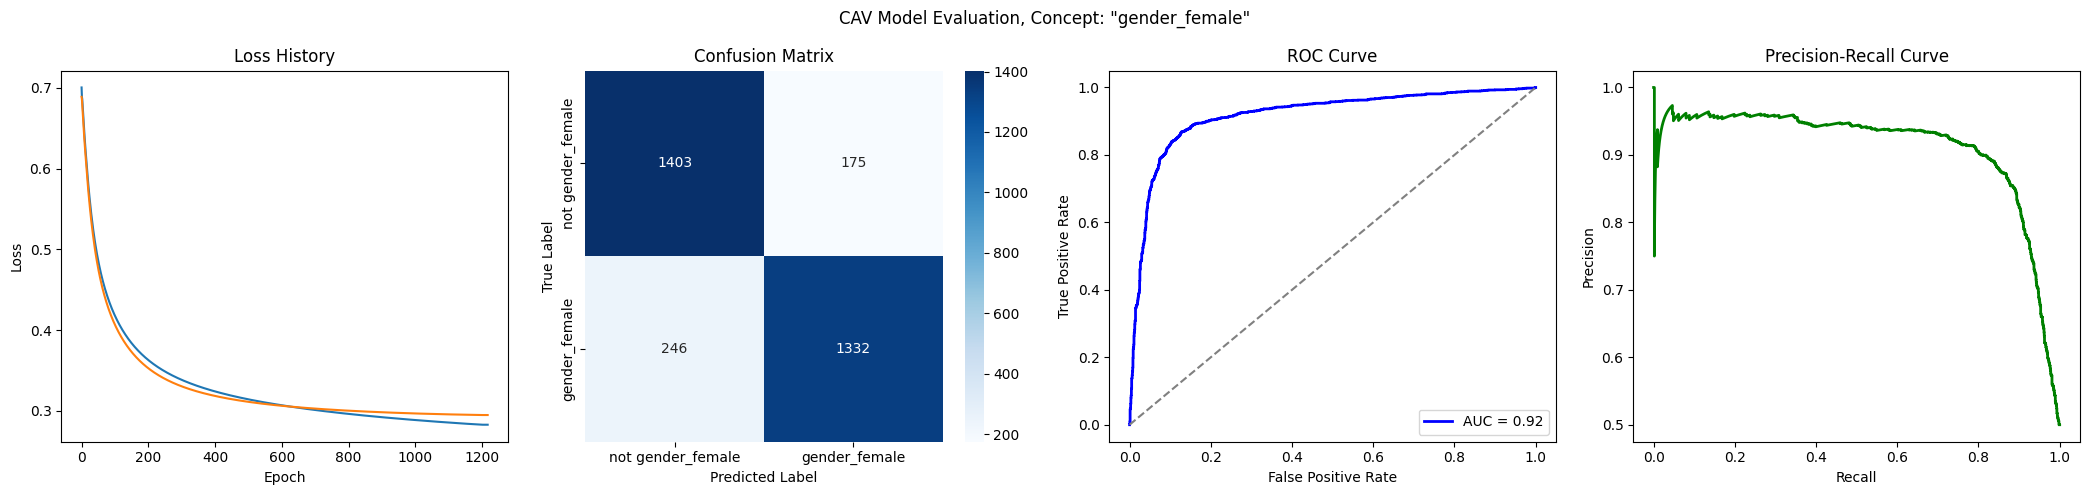


Fitting project: gender_female for encoder: whisper_large_v2
Training sample size: 9246
Validation sample size: 1028
Test sample size: 3156
Epoch 1/10000
Epoch 1 Train Loss: 0.7172
Epoch 1 Validation Loss: 0.6985
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4754
Epoch 101 Validation Loss: 0.4737
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3863
Epoch 201 Validation Loss: 0.3852
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3402
Epoch 301 Validation Loss: 0.3405
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.3127
Epoch 401 Validation Loss: 0.3150
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2945
Epoch 501 Validation Loss: 0.2992
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2813
Epoch 601 Validation L

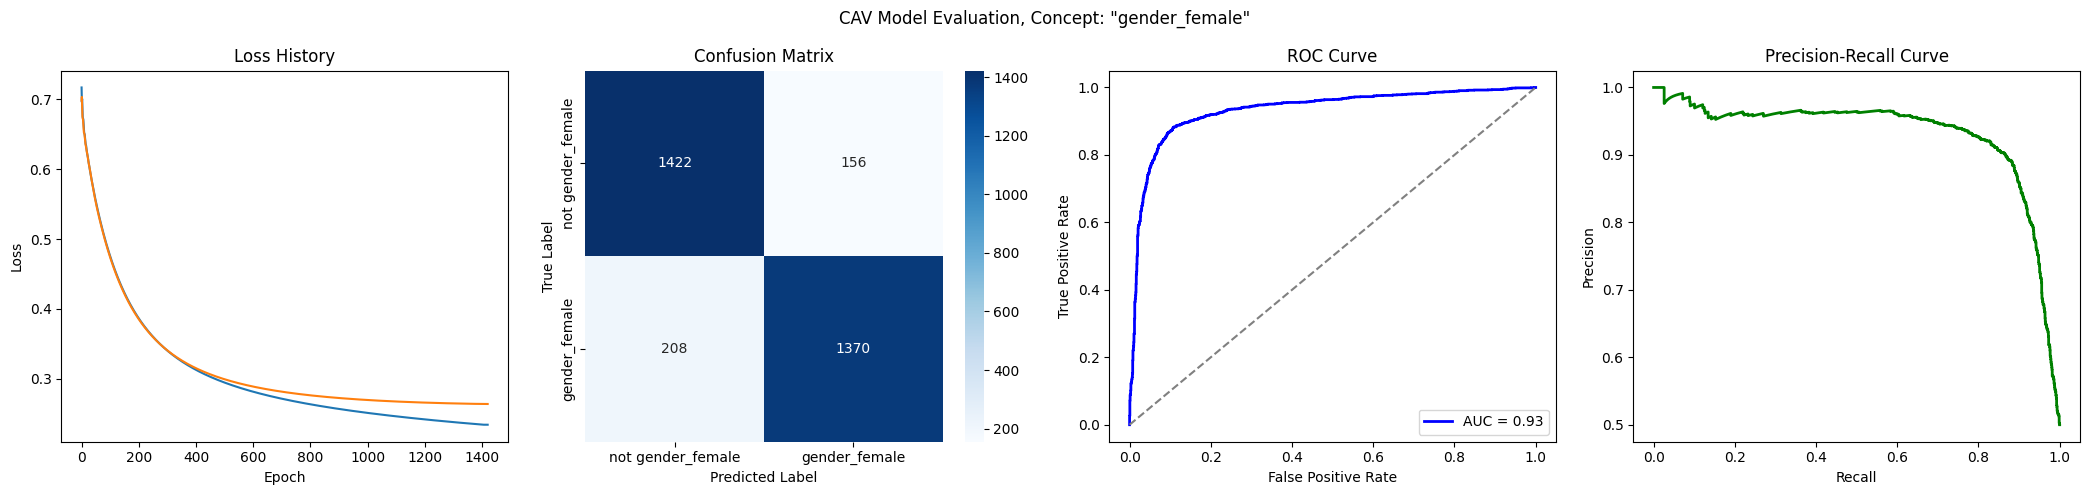


Fitting project: gender_female for encoder: muq_large_msd
Training sample size: 9246
Validation sample size: 1028
Test sample size: 3156
Epoch 1/10000
Epoch 1 Train Loss: 0.6907
Epoch 1 Validation Loss: 0.6646
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2899
Epoch 101 Validation Loss: 0.2879
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2703
Epoch 201 Validation Loss: 0.2785
Model saved to trainings/gender_female/state_dict.pth
Early stopping at epoch 300
Loss history saved to trainings/gender_female/loss_history.json


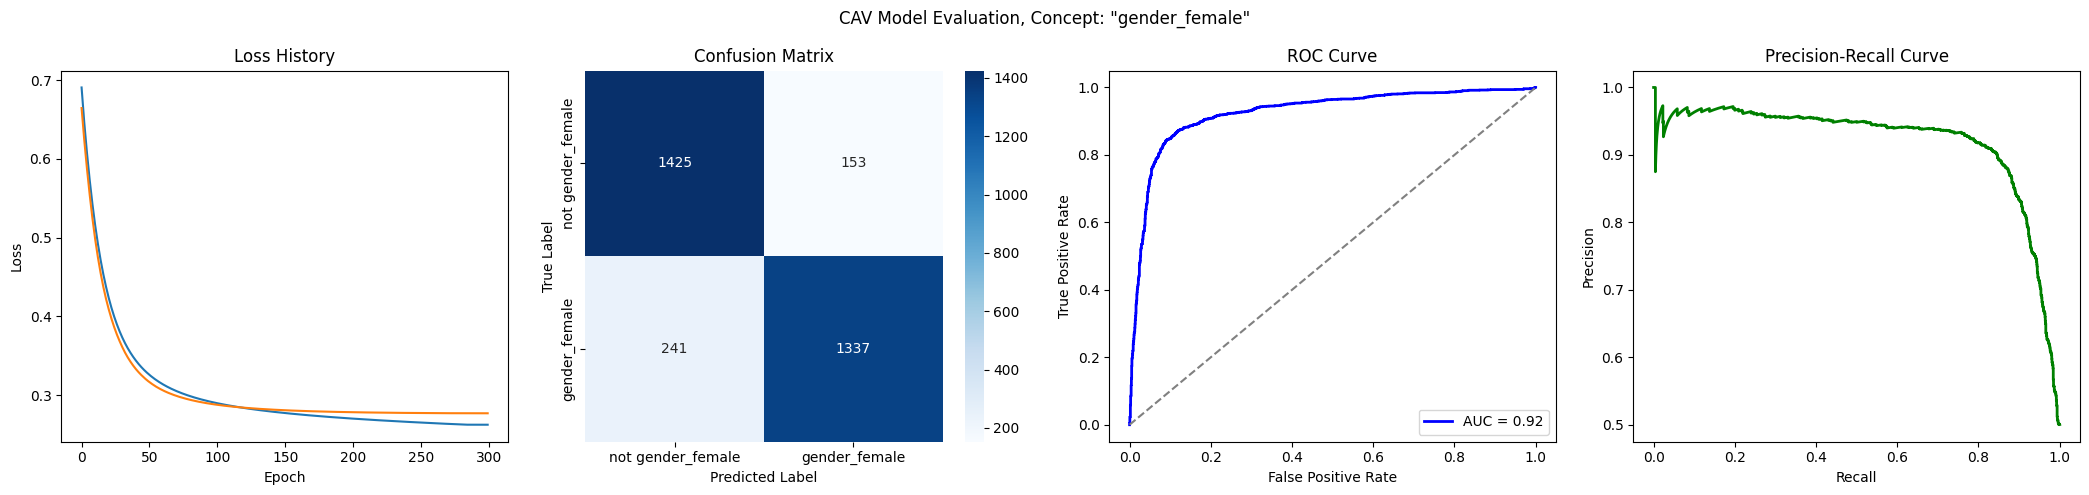


Fitting project: gender_female for encoder: muq_mulan_large
Training sample size: 9246
Validation sample size: 1028
Test sample size: 3156
Epoch 1/10000
Epoch 1 Train Loss: 0.6939
Epoch 1 Validation Loss: 0.6913
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.6049
Epoch 101 Validation Loss: 0.6078
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5795
Epoch 201 Validation Loss: 0.5792
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5646
Epoch 301 Validation Loss: 0.5616
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5535
Epoch 401 Validation Loss: 0.5485
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5442
Epoch 501 Validation Loss: 0.5379
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5359
Epoch 601 Validation Lo

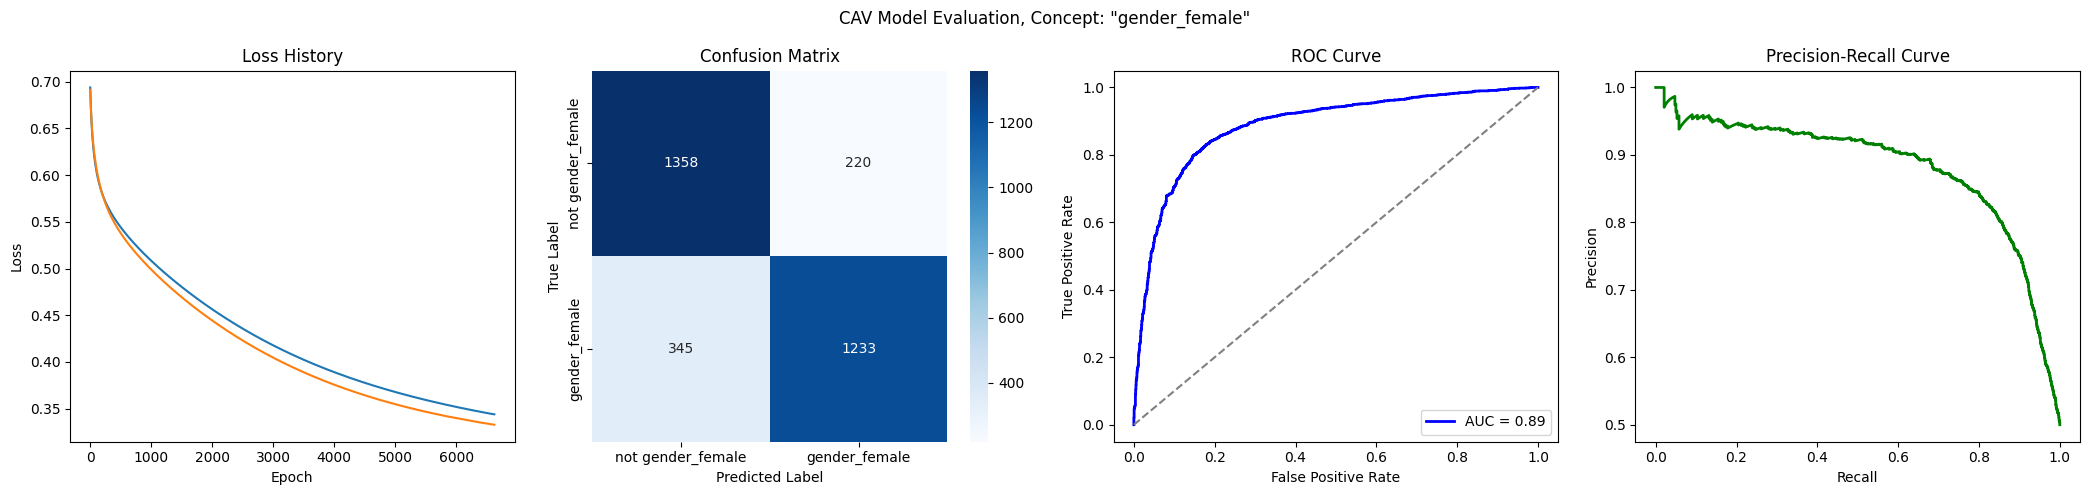


Fitting project: gender_male for encoder: mert_v1_95m
Training sample size: 9306
Validation sample size: 1034
Test sample size: 3158
Epoch 1/10000
Epoch 1 Train Loss: 0.6991
Epoch 1 Validation Loss: 0.6920
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4054
Epoch 101 Validation Loss: 0.3961
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3484
Epoch 201 Validation Loss: 0.3463
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3226
Epoch 301 Validation Loss: 0.3258
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.3076
Epoch 401 Validation Loss: 0.3150
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2976
Epoch 501 Validation Loss: 0.3086
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2901
Epoch 601 Validation Loss: 0.3044
Model s

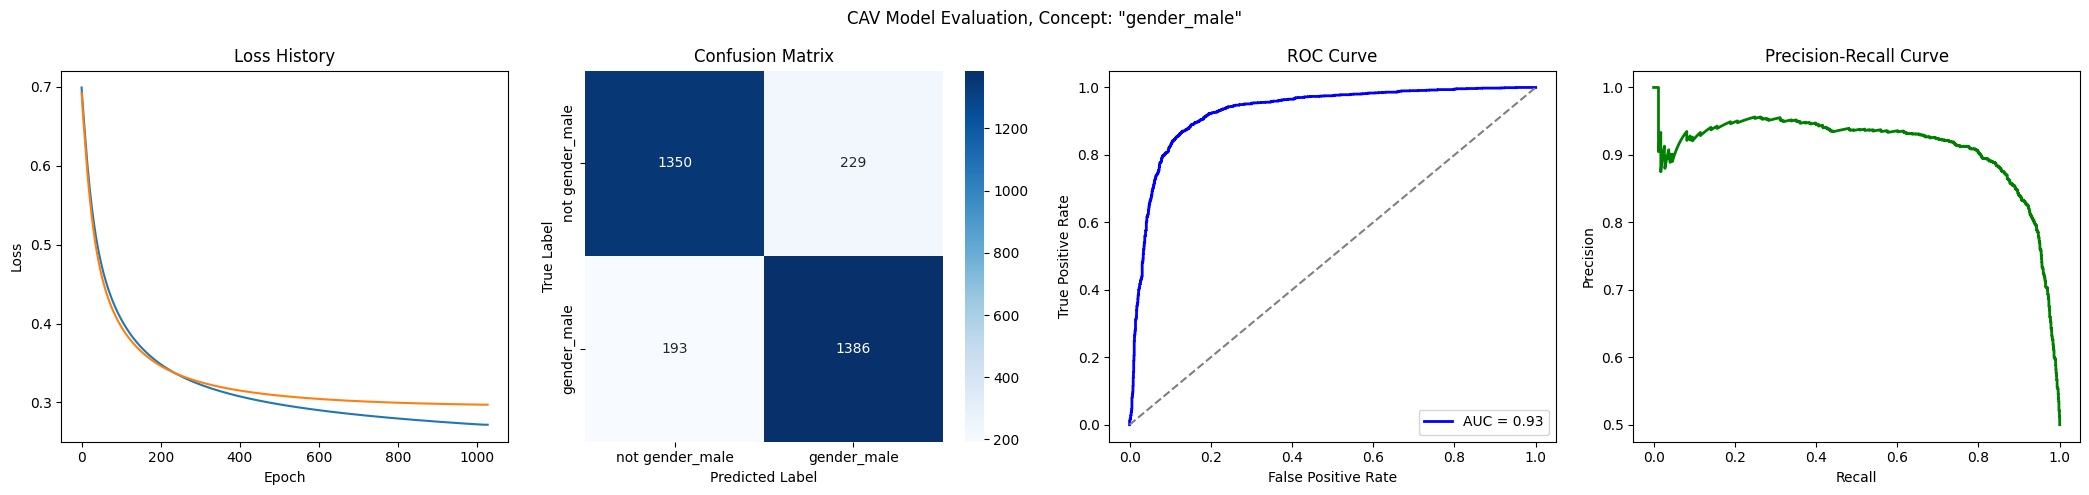


Fitting project: gender_male for encoder: whisper_large_v2
Training sample size: 9306
Validation sample size: 1034
Test sample size: 3158
Epoch 1/10000
Epoch 1 Train Loss: 0.6903
Epoch 1 Validation Loss: 0.6884
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4529
Epoch 101 Validation Loss: 0.4486
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3644
Epoch 201 Validation Loss: 0.3668
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3201
Epoch 301 Validation Loss: 0.3279
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2940
Epoch 401 Validation Loss: 0.3068
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2767
Epoch 501 Validation Loss: 0.2942
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2642
Epoch 601 Validation Loss: 0.2862
Mo

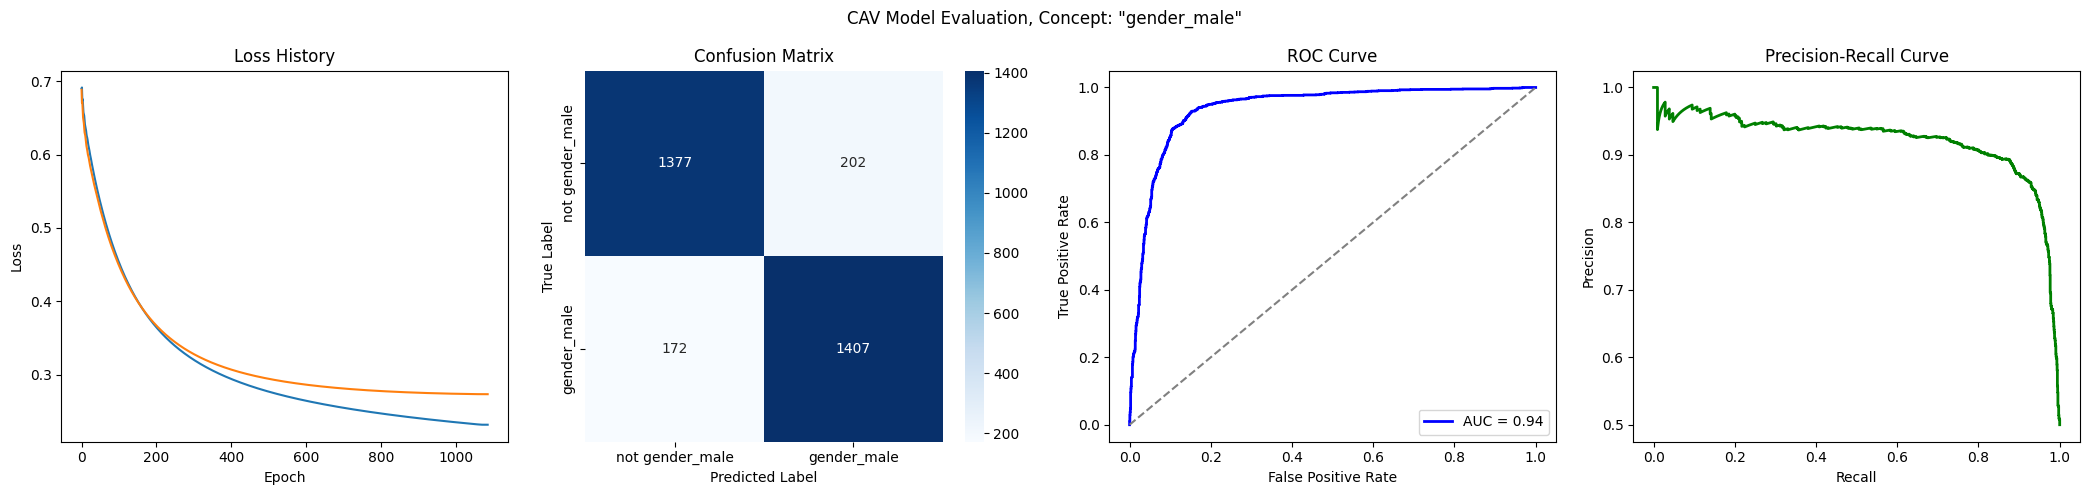


Fitting project: gender_male for encoder: muq_large_msd
Training sample size: 9306
Validation sample size: 1034
Test sample size: 3158
Epoch 1/10000
Epoch 1 Train Loss: 0.6946
Epoch 1 Validation Loss: 0.6724
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2780
Epoch 101 Validation Loss: 0.2945
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2567
Epoch 201 Validation Loss: 0.2861
Model saved to trainings/gender_male/state_dict.pth
Early stopping at epoch 224
Loss history saved to trainings/gender_male/loss_history.json


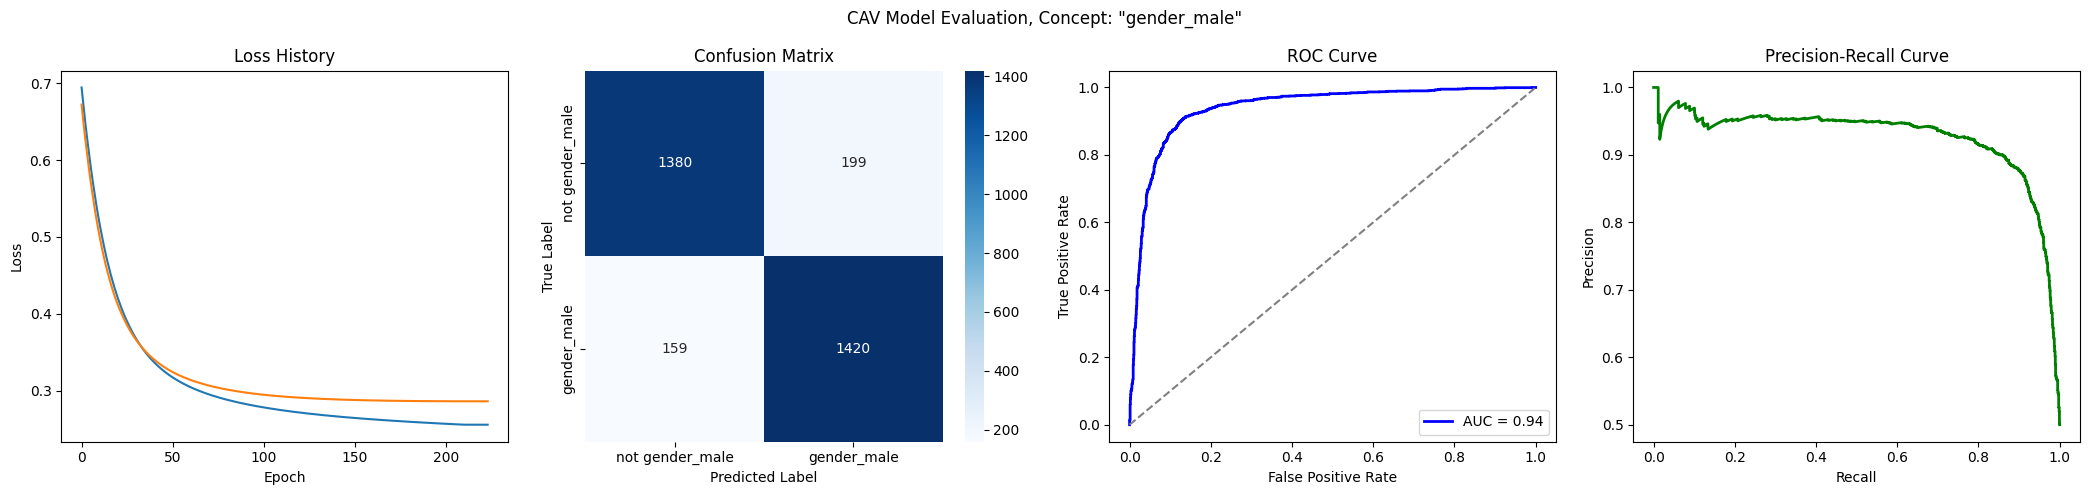


Fitting project: gender_male for encoder: muq_mulan_large
Training sample size: 9306
Validation sample size: 1034
Test sample size: 3158
Epoch 1/10000
Epoch 1 Train Loss: 0.6936
Epoch 1 Validation Loss: 0.6910
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.6042
Epoch 101 Validation Loss: 0.5991
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5783
Epoch 201 Validation Loss: 0.5728
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5630
Epoch 301 Validation Loss: 0.5572
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5516
Epoch 401 Validation Loss: 0.5456
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5422
Epoch 501 Validation Loss: 0.5359
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5337
Epoch 601 Validation Loss: 0.5272
Mod

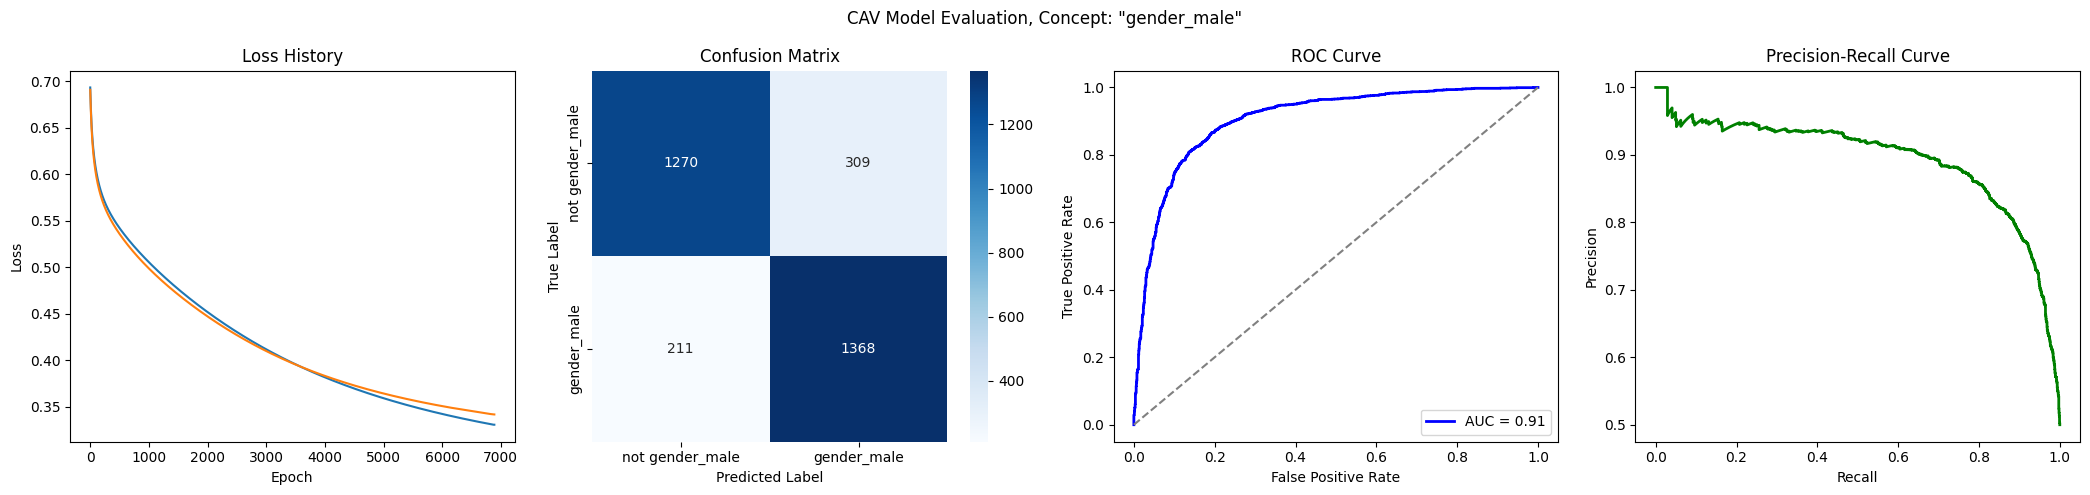


Fitting project: language_de for encoder: mert_v1_95m
Training sample size: 1391
Validation sample size: 155
Test sample size: 632
Epoch 1/10000
Epoch 1 Train Loss: 0.6961
Epoch 1 Validation Loss: 0.6919
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5029
Epoch 101 Validation Loss: 0.6020
Model saved to trainings/language_de/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4423
Epoch 201 Validation Loss: 0.5887
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 221
Loss history saved to trainings/language_de/loss_history.json


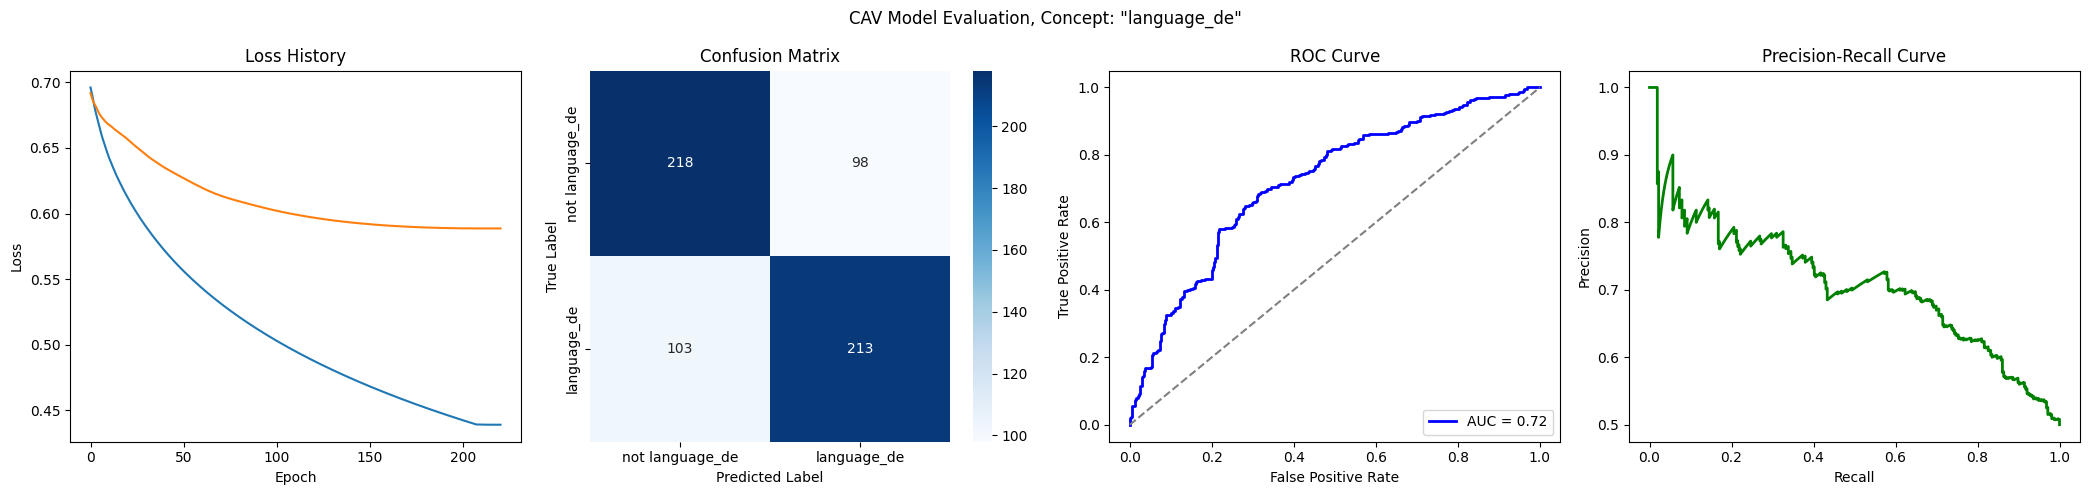


Fitting project: language_de for encoder: whisper_large_v2
Training sample size: 1391
Validation sample size: 155
Test sample size: 632
Epoch 1/10000
Epoch 1 Train Loss: 0.6865
Epoch 1 Validation Loss: 0.6490
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0537
Epoch 101 Validation Loss: 0.0627
Model saved to trainings/language_de/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0337
Epoch 201 Validation Loss: 0.0488
Model saved to trainings/language_de/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0249
Epoch 301 Validation Loss: 0.0469
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 310
Loss history saved to trainings/language_de/loss_history.json


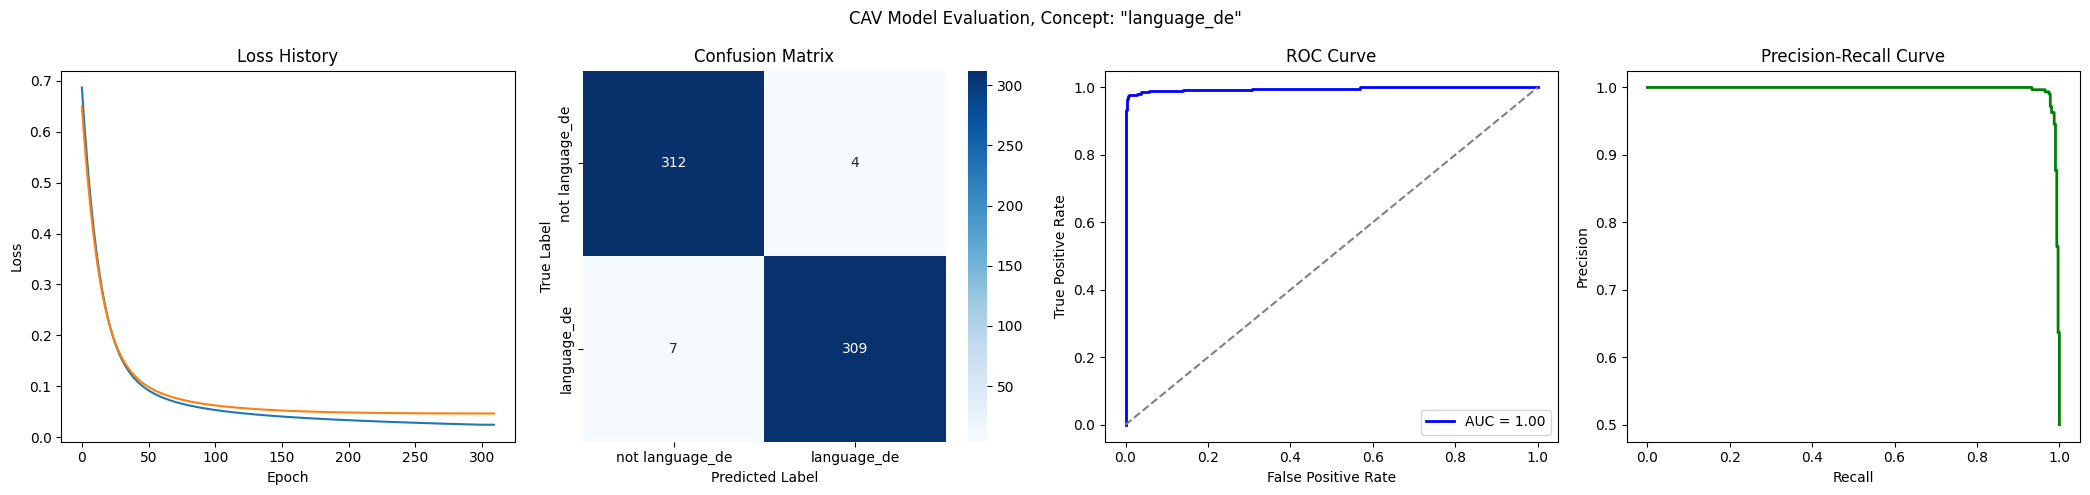


Fitting project: language_de for encoder: muq_large_msd
Training sample size: 1391
Validation sample size: 155
Test sample size: 632
Epoch 1/10000
Epoch 1 Train Loss: 0.7001
Epoch 1 Validation Loss: 0.6802
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2688
Epoch 101 Validation Loss: 0.3599
Model saved to trainings/language_de/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2050
Epoch 201 Validation Loss: 0.3274
Model saved to trainings/language_de/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.1683
Epoch 301 Validation Loss: 0.3196
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 332
Loss history saved to trainings/language_de/loss_history.json


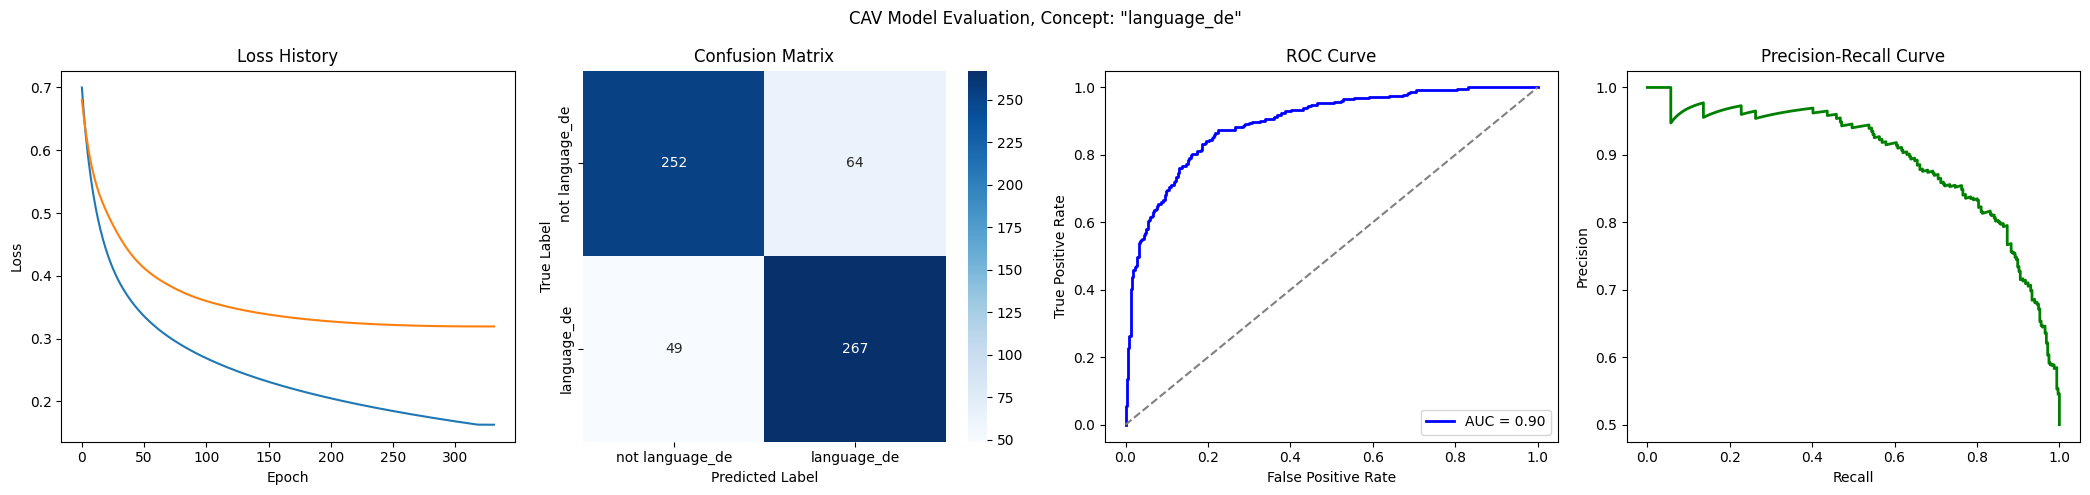


Fitting project: language_de for encoder: muq_mulan_large
Training sample size: 1391
Validation sample size: 155
Test sample size: 632
Epoch 1/10000
Epoch 1 Train Loss: 0.6940
Epoch 1 Validation Loss: 0.6915
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5799
Epoch 101 Validation Loss: 0.6022
Model saved to trainings/language_de/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5462
Epoch 201 Validation Loss: 0.5717
Model saved to trainings/language_de/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5291
Epoch 301 Validation Loss: 0.5563
Model saved to trainings/language_de/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5180
Epoch 401 Validation Loss: 0.5471
Model saved to trainings/language_de/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5097
Epoch 501 Validation Loss: 0.5407
Model saved to trainings/language_de/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5031
Epoch 601 Validation Loss: 0.5356
Model

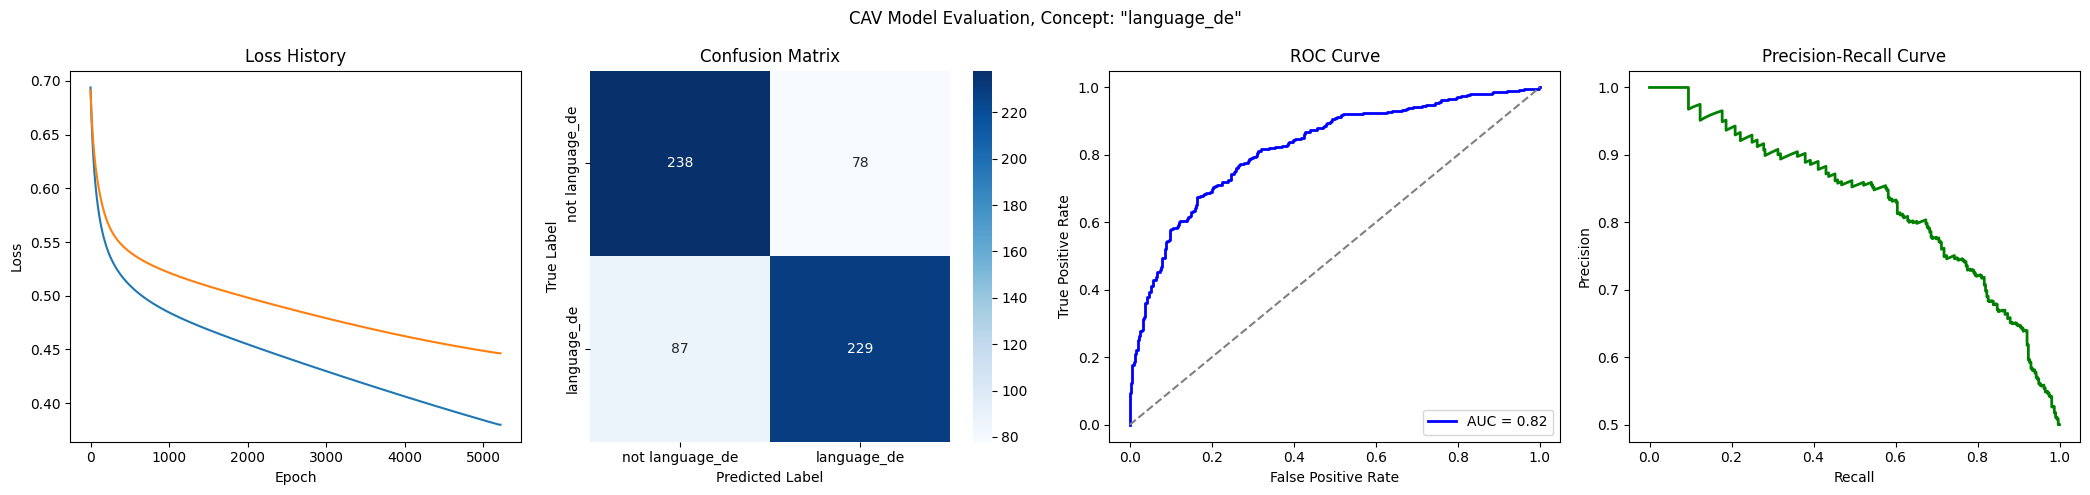


Fitting project: language_en for encoder: mert_v1_95m
Training sample size: 8744
Validation sample size: 972
Test sample size: 1676
Epoch 1/10000
Epoch 1 Train Loss: 0.6943
Epoch 1 Validation Loss: 0.6927
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5651
Epoch 101 Validation Loss: 0.5684
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5271
Epoch 201 Validation Loss: 0.5401
Model saved to trainings/language_en/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5045
Epoch 301 Validation Loss: 0.5254
Model saved to trainings/language_en/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.4880
Epoch 401 Validation Loss: 0.5155
Model saved to trainings/language_en/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.4752
Epoch 501 Validation Loss: 0.5081
Model saved to trainings/language_en/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.4648
Epoch 601 Validation Loss: 0.5024
Model sa

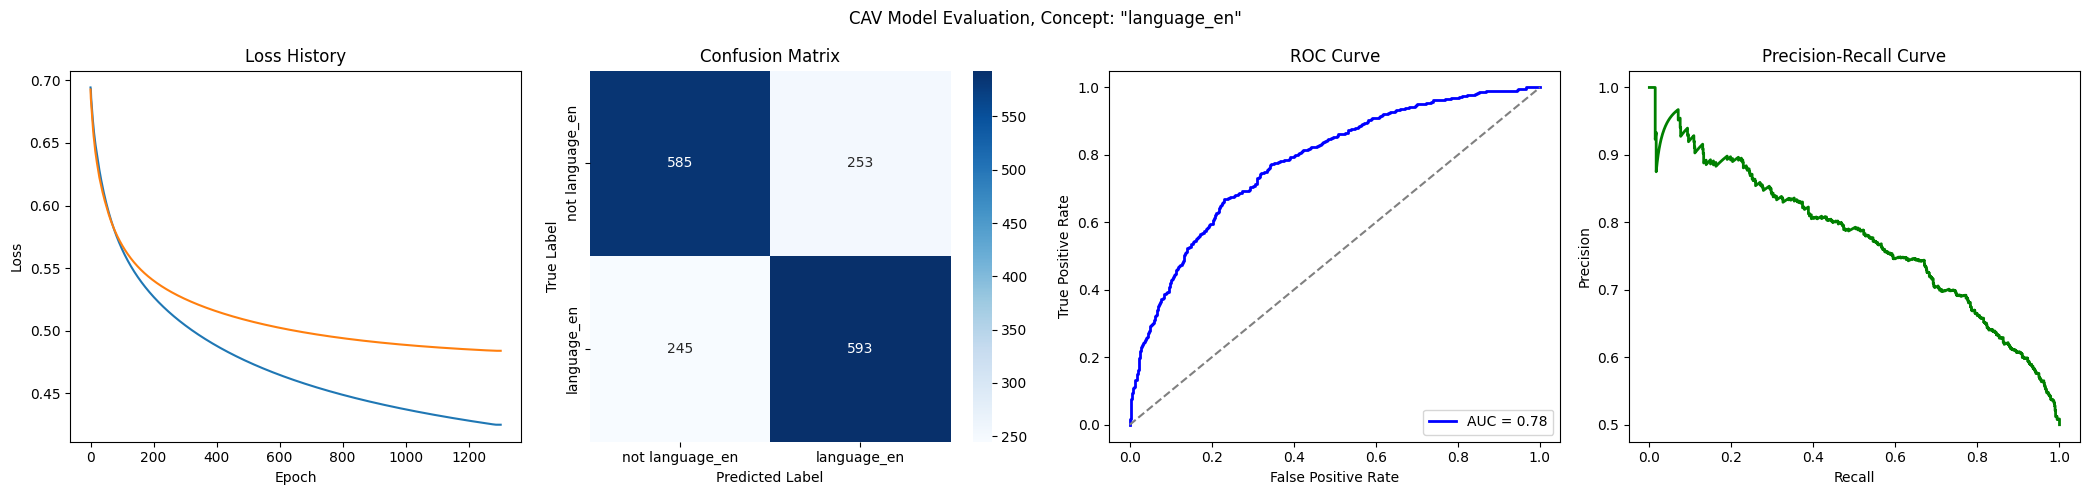


Fitting project: language_en for encoder: whisper_large_v2
Training sample size: 8744
Validation sample size: 972
Test sample size: 1676
Epoch 1/10000
Epoch 1 Train Loss: 0.7257
Epoch 1 Validation Loss: 0.6510
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0580
Epoch 101 Validation Loss: 0.0624
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0491
Epoch 201 Validation Loss: 0.0544
Model saved to trainings/language_en/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0459
Epoch 301 Validation Loss: 0.0521
Model saved to trainings/language_en/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0439
Epoch 401 Validation Loss: 0.0510
Model saved to trainings/language_en/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0423
Epoch 501 Validation Loss: 0.0502
Model saved to trainings/language_en/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0409
Epoch 601 Validation Loss: 0.0496
Mod

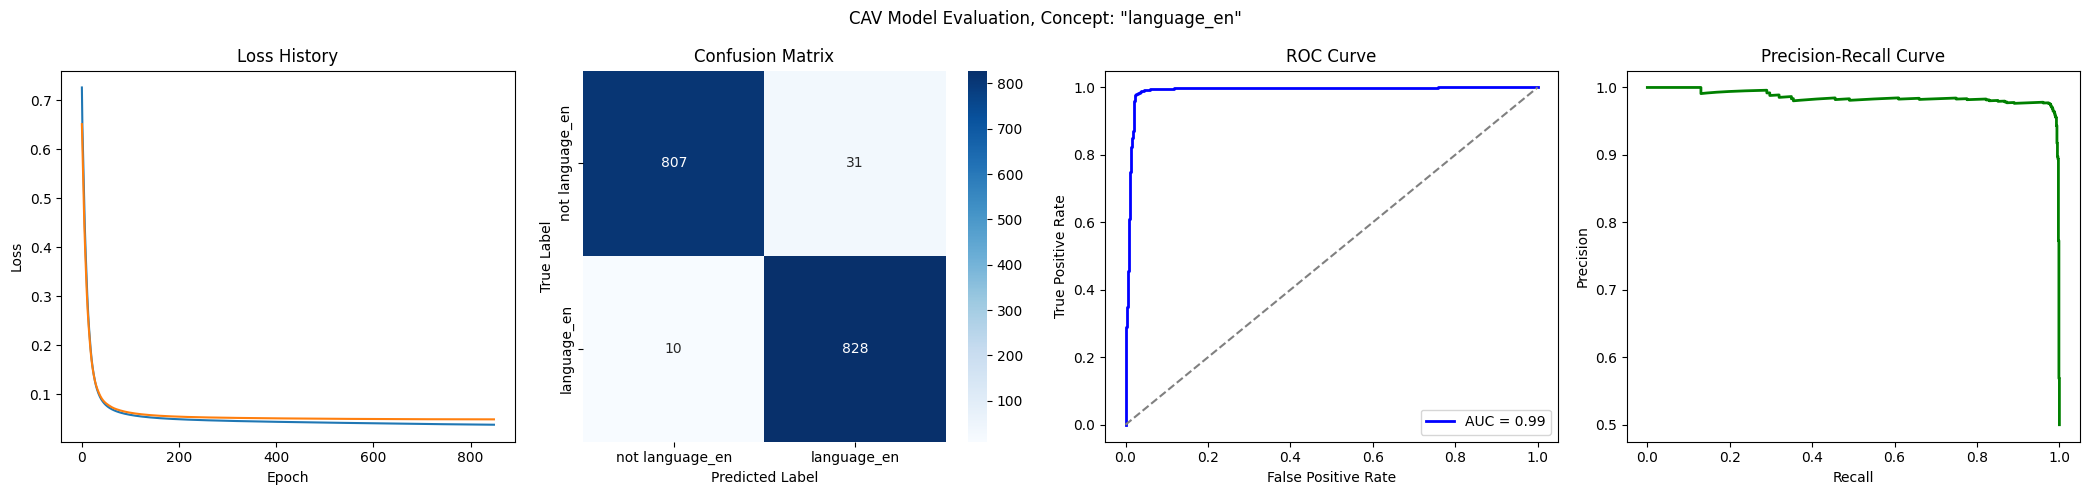


Fitting project: language_en for encoder: muq_large_msd
Training sample size: 8744
Validation sample size: 972
Test sample size: 1676
Epoch 1/10000
Epoch 1 Train Loss: 0.6999
Epoch 1 Validation Loss: 0.6794
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2532
Epoch 101 Validation Loss: 0.2664
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2089
Epoch 201 Validation Loss: 0.2255
Model saved to trainings/language_en/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.1886
Epoch 301 Validation Loss: 0.2096
Model saved to trainings/language_en/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.1759
Epoch 401 Validation Loss: 0.2016
Model saved to trainings/language_en/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.1668
Epoch 501 Validation Loss: 0.1970
Model saved to trainings/language_en/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.1598
Epoch 601 Validation Loss: 0.1942
Model 

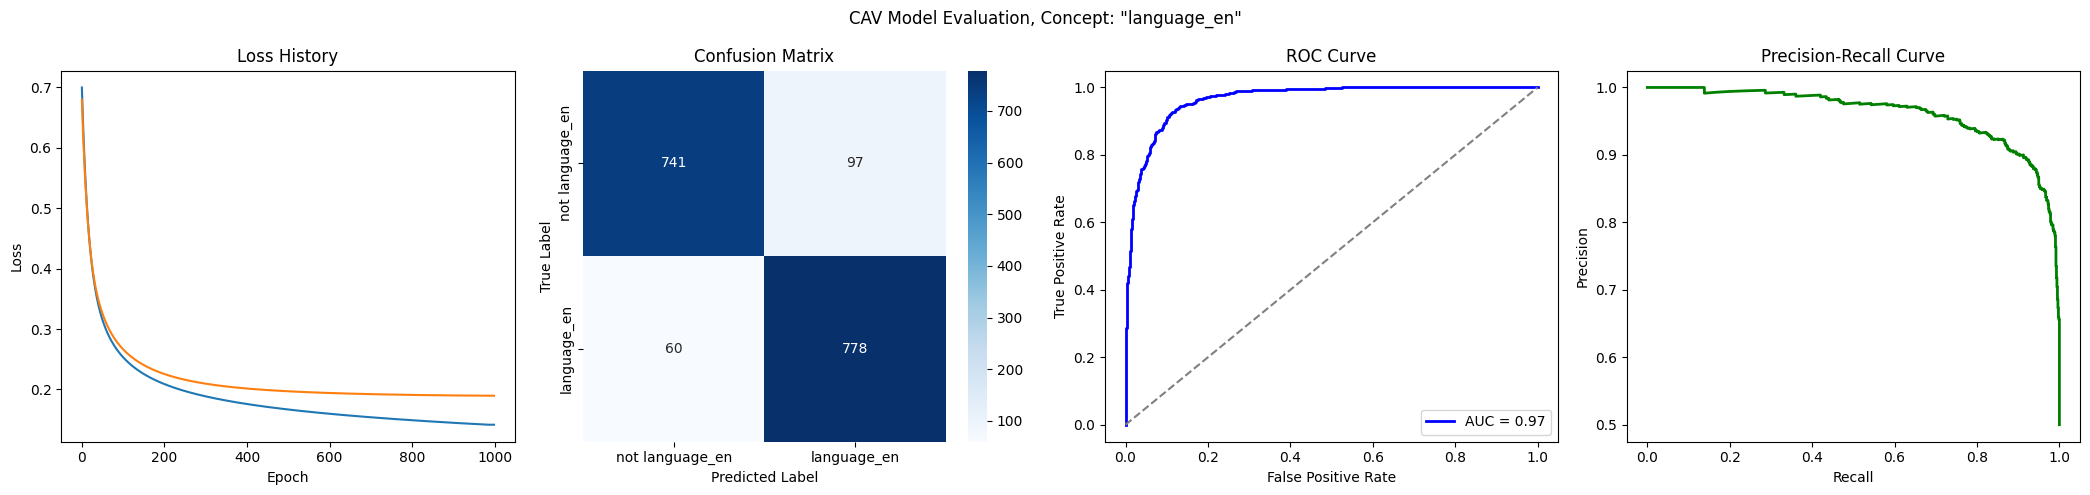


Fitting project: language_en for encoder: muq_mulan_large
Training sample size: 8744
Validation sample size: 972
Test sample size: 1676
Epoch 1/10000
Epoch 1 Train Loss: 0.6932
Epoch 1 Validation Loss: 0.6893
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4893
Epoch 101 Validation Loss: 0.5027
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4270
Epoch 201 Validation Loss: 0.4468
Model saved to trainings/language_en/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3973
Epoch 301 Validation Loss: 0.4191
Model saved to trainings/language_en/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.3795
Epoch 401 Validation Loss: 0.4015
Model saved to trainings/language_en/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.3673
Epoch 501 Validation Loss: 0.3886
Model saved to trainings/language_en/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.3582
Epoch 601 Validation Loss: 0.3787
Mode

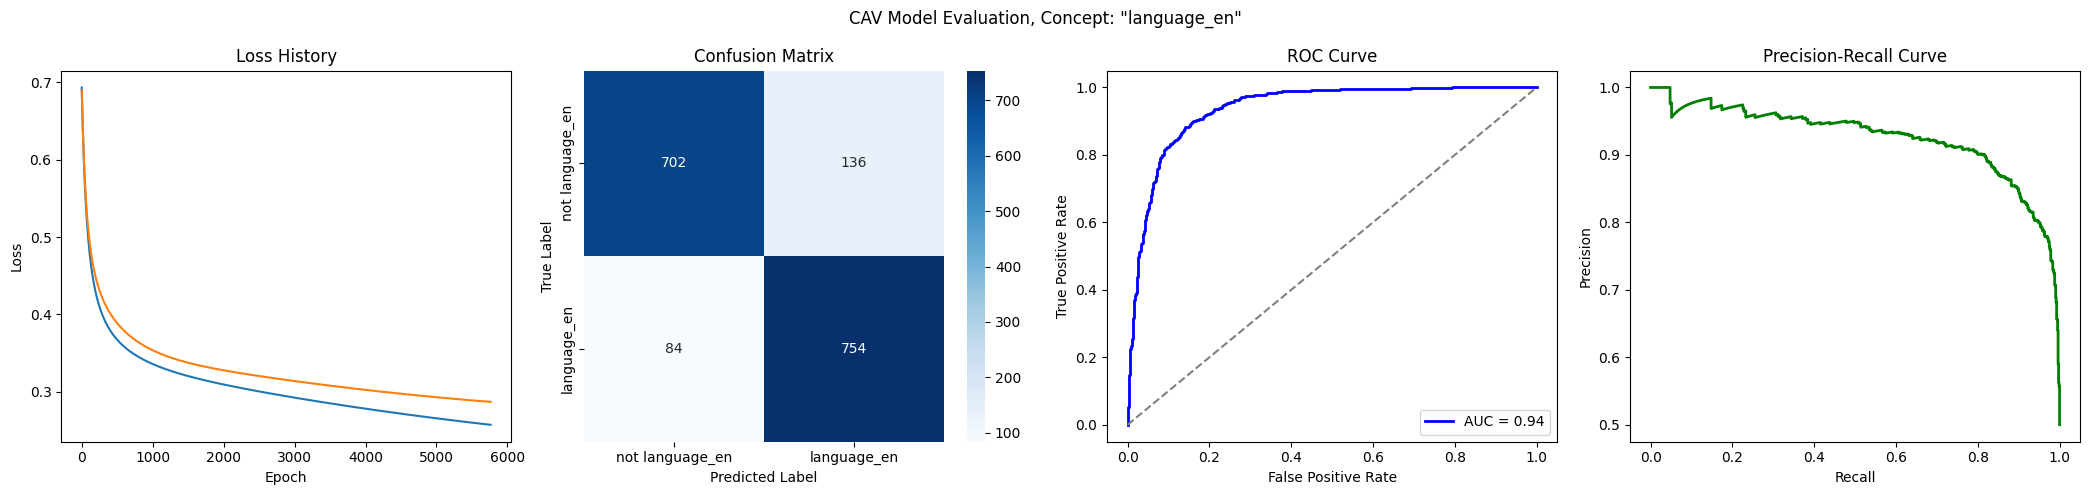


Fitting project: language_es for encoder: mert_v1_95m
Training sample size: 675
Validation sample size: 75
Test sample size: 718
Epoch 1/10000
Epoch 1 Train Loss: 0.6963
Epoch 1 Validation Loss: 0.6990
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5110
Epoch 101 Validation Loss: 0.5983
Model saved to trainings/language_es/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4336
Epoch 201 Validation Loss: 0.5723
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 282
Loss history saved to trainings/language_es/loss_history.json


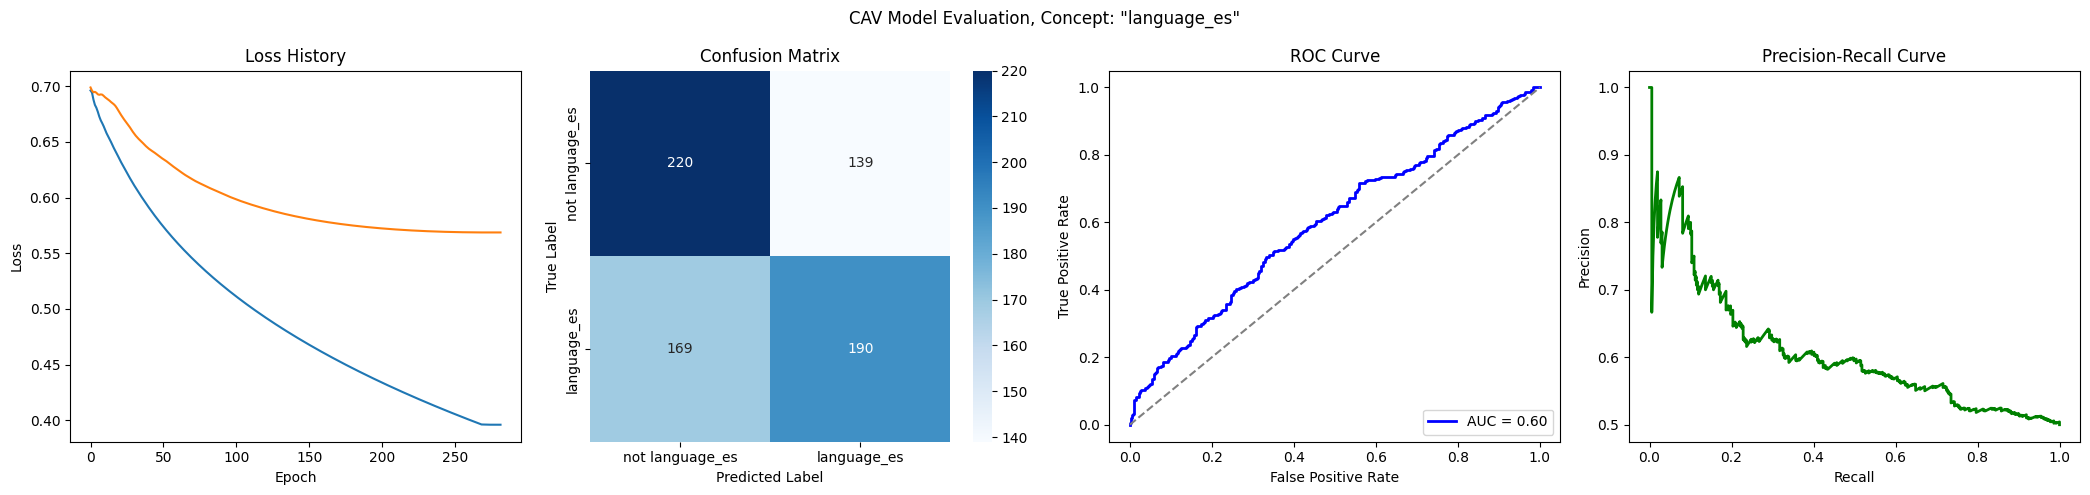


Fitting project: language_es for encoder: whisper_large_v2
Training sample size: 675
Validation sample size: 75
Test sample size: 718
Epoch 1/10000
Epoch 1 Train Loss: 0.6975
Epoch 1 Validation Loss: 0.6690
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0851
Epoch 101 Validation Loss: 0.1061
Model saved to trainings/language_es/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0475
Epoch 201 Validation Loss: 0.0798
Model saved to trainings/language_es/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0313
Epoch 301 Validation Loss: 0.0743
Model saved to trainings/language_es/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0221
Epoch 401 Validation Loss: 0.0729
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 481
Loss history saved to trainings/language_es/loss_history.json


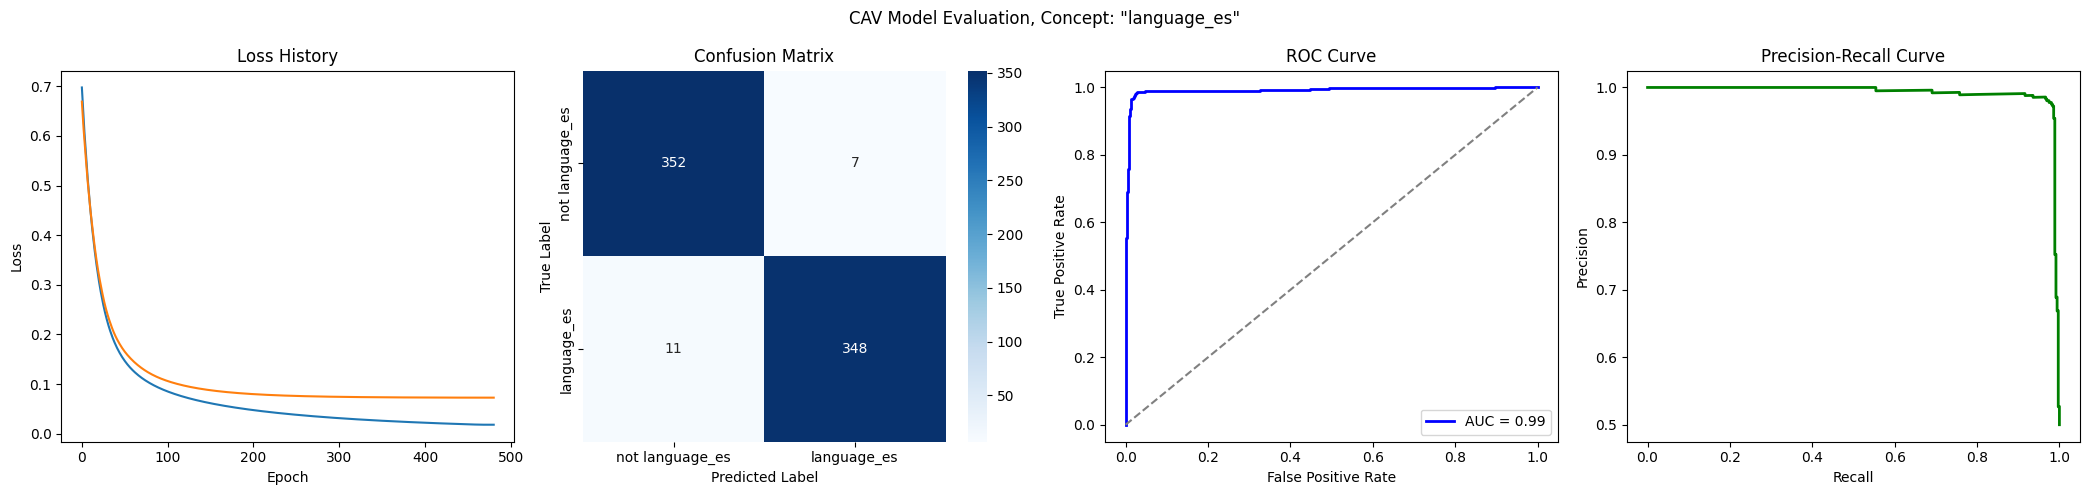


Fitting project: language_es for encoder: muq_large_msd
Training sample size: 675
Validation sample size: 75
Test sample size: 718
Epoch 1/10000
Epoch 1 Train Loss: 0.7034
Epoch 1 Validation Loss: 0.6816
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2786
Epoch 101 Validation Loss: 0.4057
Model saved to trainings/language_es/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.1976
Epoch 201 Validation Loss: 0.3847
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 234
Loss history saved to trainings/language_es/loss_history.json


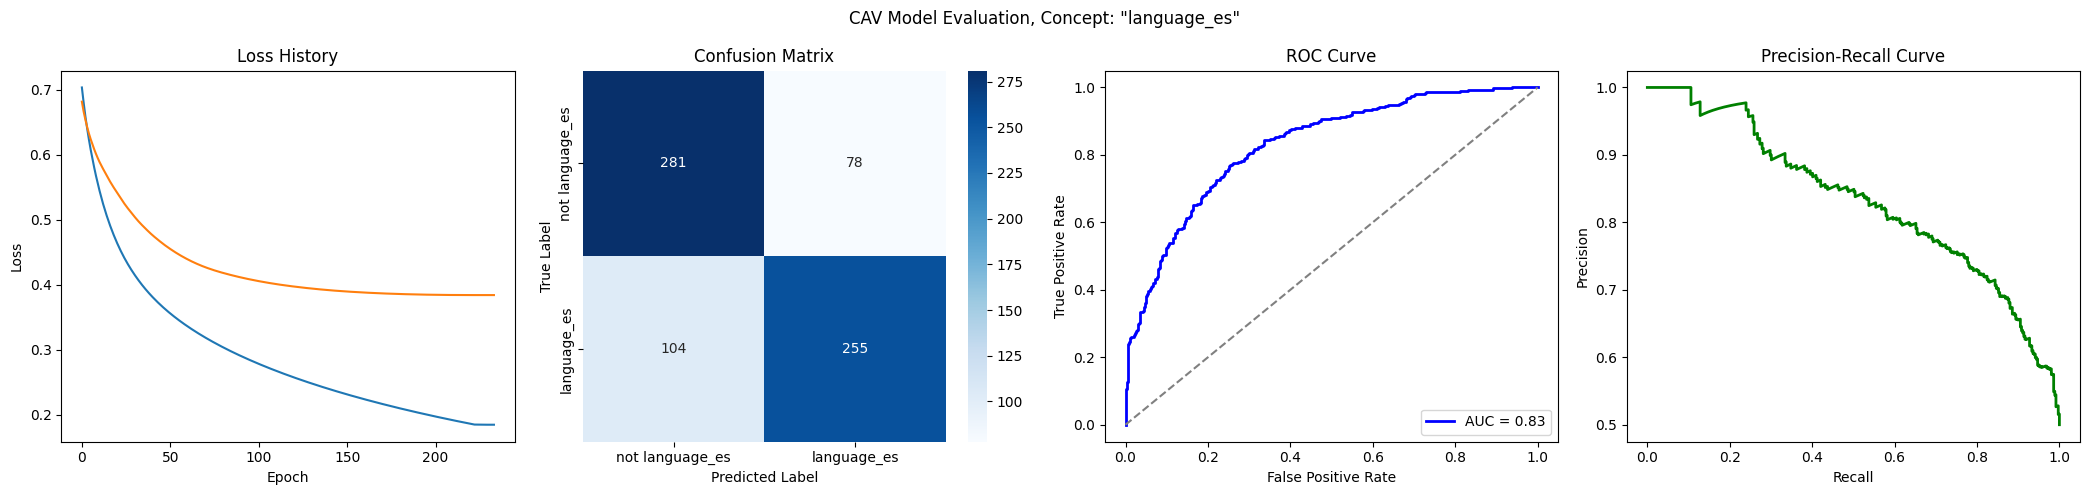


Fitting project: language_es for encoder: muq_mulan_large
Training sample size: 675
Validation sample size: 75
Test sample size: 718
Epoch 1/10000
Epoch 1 Train Loss: 0.6939
Epoch 1 Validation Loss: 0.6917
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5428
Epoch 101 Validation Loss: 0.5877
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 192
Loss history saved to trainings/language_es/loss_history.json


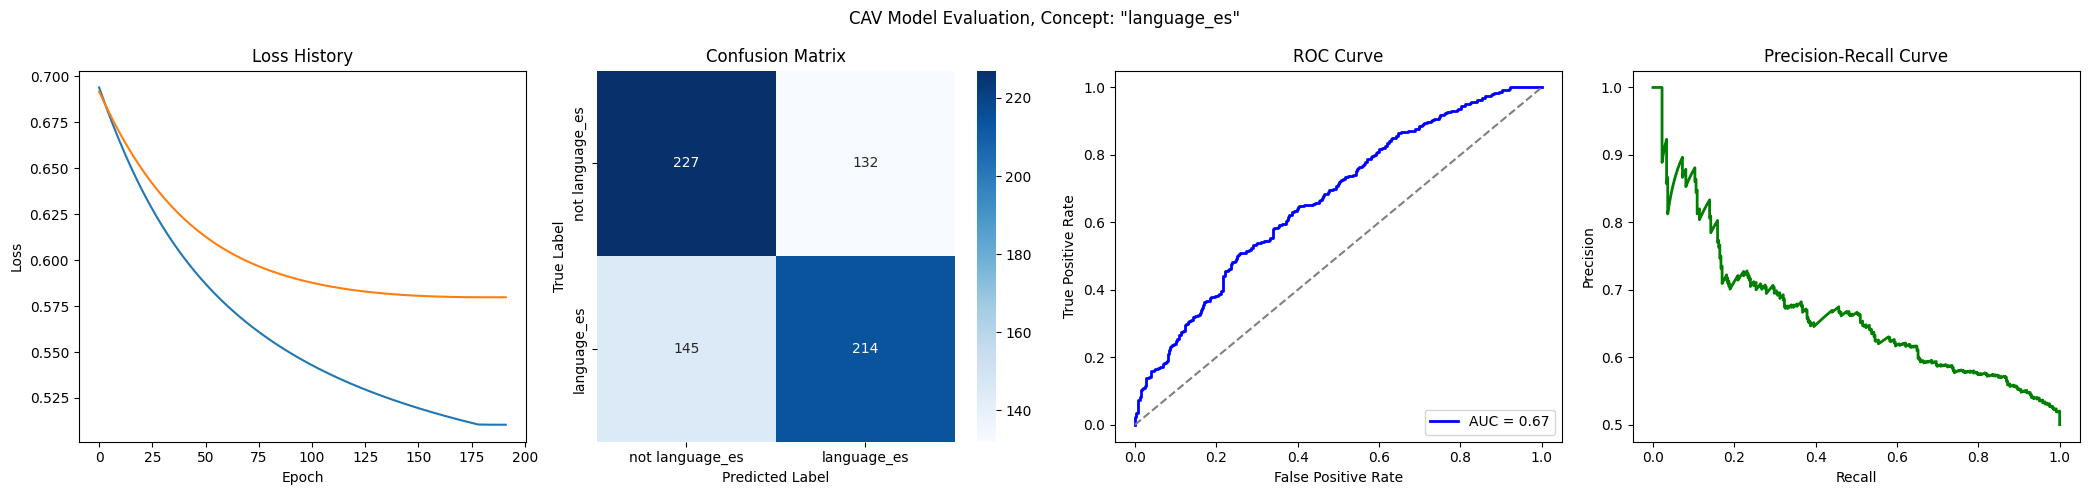


Fitting project: language_fr for encoder: mert_v1_95m
Training sample size: 5385
Validation sample size: 599
Test sample size: 928
Epoch 1/10000
Epoch 1 Train Loss: 0.6968
Epoch 1 Validation Loss: 0.6956
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5363
Epoch 101 Validation Loss: 0.5514
Model saved to trainings/language_fr/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4908
Epoch 201 Validation Loss: 0.5280
Model saved to trainings/language_fr/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.4653
Epoch 301 Validation Loss: 0.5187
Model saved to trainings/language_fr/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.4475
Epoch 401 Validation Loss: 0.5133
Model saved to trainings/language_fr/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.4339
Epoch 501 Validation Loss: 0.5096
Model saved to trainings/language_fr/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.4228
Epoch 601 Validation Loss: 0.5070
Model sav

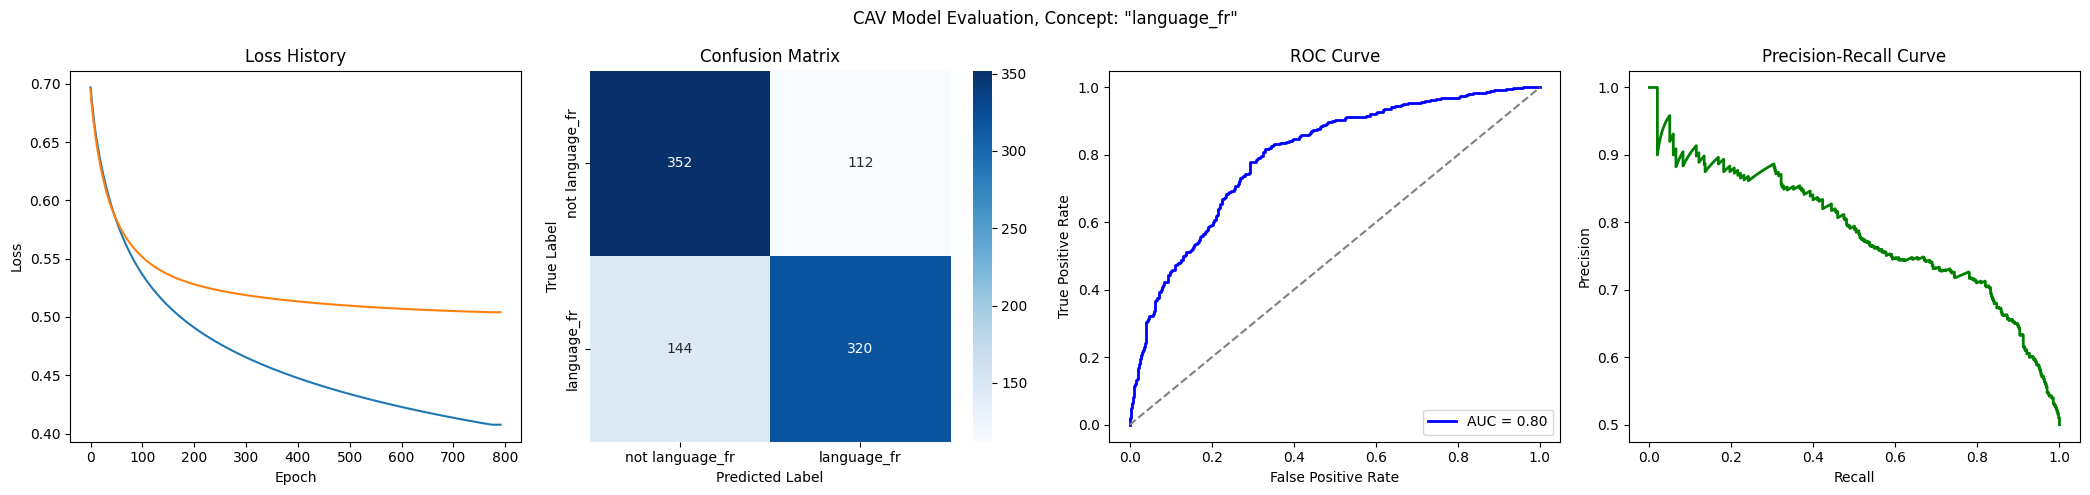


Fitting project: language_fr for encoder: whisper_large_v2
Training sample size: 5385
Validation sample size: 599
Test sample size: 928
Epoch 1/10000
Epoch 1 Train Loss: 0.7060
Epoch 1 Validation Loss: 0.6613
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0600
Epoch 101 Validation Loss: 0.0563
Model saved to trainings/language_fr/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0413
Epoch 201 Validation Loss: 0.0401
Model saved to trainings/language_fr/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0349
Epoch 301 Validation Loss: 0.0351
Model saved to trainings/language_fr/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0313
Epoch 401 Validation Loss: 0.0328
Model saved to trainings/language_fr/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0288
Epoch 501 Validation Loss: 0.0315
Model saved to trainings/language_fr/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0267
Epoch 601 Validation Loss: 0.0307
Mode

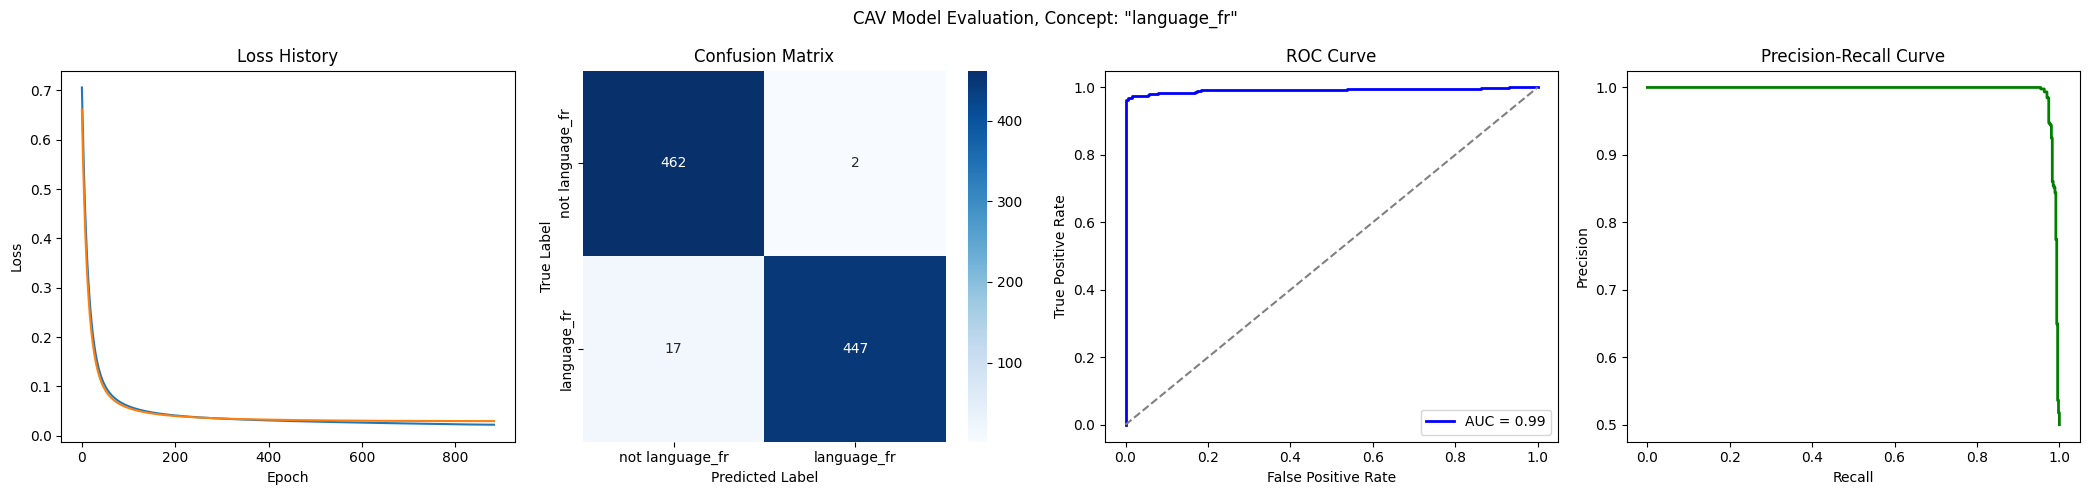


Fitting project: language_fr for encoder: muq_large_msd
Training sample size: 5385
Validation sample size: 599
Test sample size: 928
Epoch 1/10000
Epoch 1 Train Loss: 0.6912
Epoch 1 Validation Loss: 0.6691
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.3406
Epoch 101 Validation Loss: 0.3462
Model saved to trainings/language_fr/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2944
Epoch 201 Validation Loss: 0.3133
Model saved to trainings/language_fr/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.2691
Epoch 301 Validation Loss: 0.2966
Model saved to trainings/language_fr/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2521
Epoch 401 Validation Loss: 0.2863
Model saved to trainings/language_fr/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2393
Epoch 501 Validation Loss: 0.2796
Model saved to trainings/language_fr/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2291
Epoch 601 Validation Loss: 0.2752
Model s

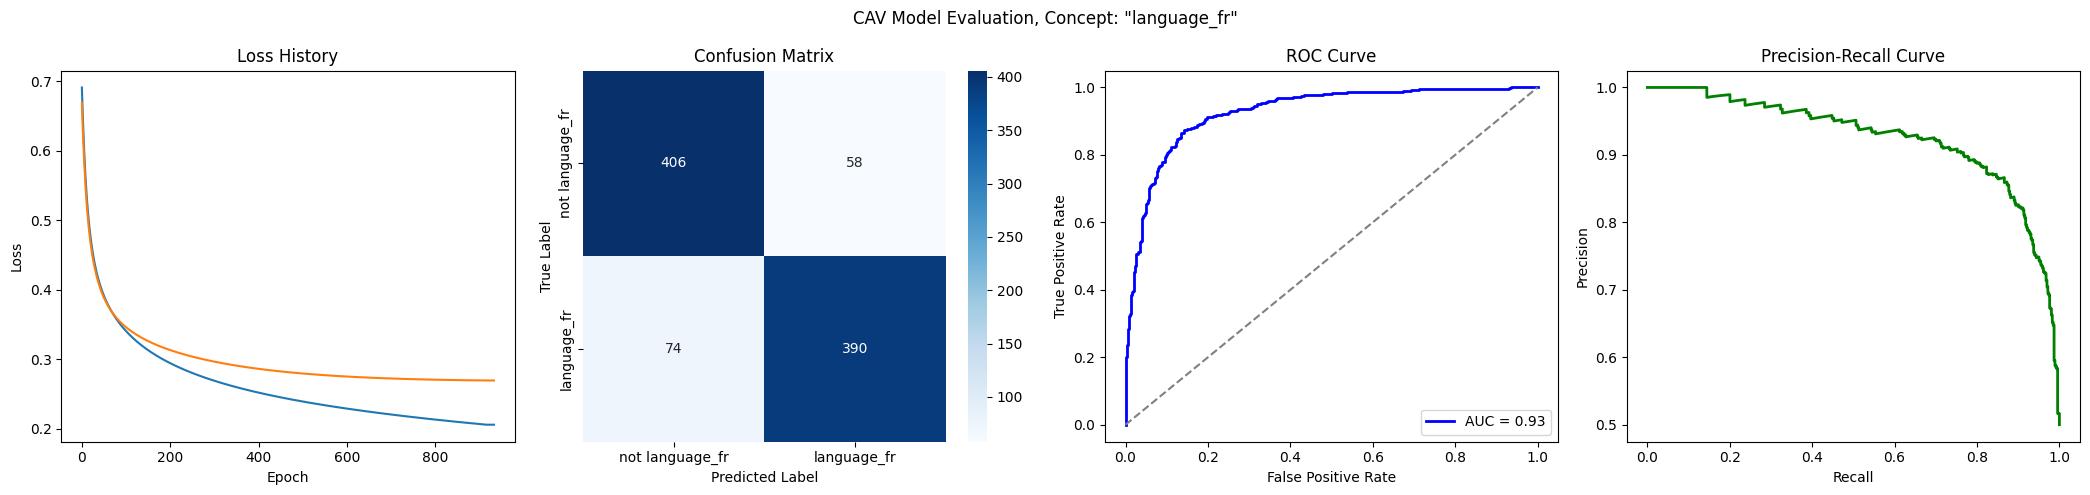


Fitting project: language_fr for encoder: muq_mulan_large
Training sample size: 5385
Validation sample size: 599
Test sample size: 928
Epoch 1/10000
Epoch 1 Train Loss: 0.6952
Epoch 1 Validation Loss: 0.6926
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5694
Epoch 101 Validation Loss: 0.5495
Model saved to trainings/language_fr/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5482
Epoch 201 Validation Loss: 0.5230
Model saved to trainings/language_fr/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5382
Epoch 301 Validation Loss: 0.5120
Model saved to trainings/language_fr/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5312
Epoch 401 Validation Loss: 0.5054
Model saved to trainings/language_fr/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5255
Epoch 501 Validation Loss: 0.5005
Model saved to trainings/language_fr/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5207
Epoch 601 Validation Loss: 0.4965
Model

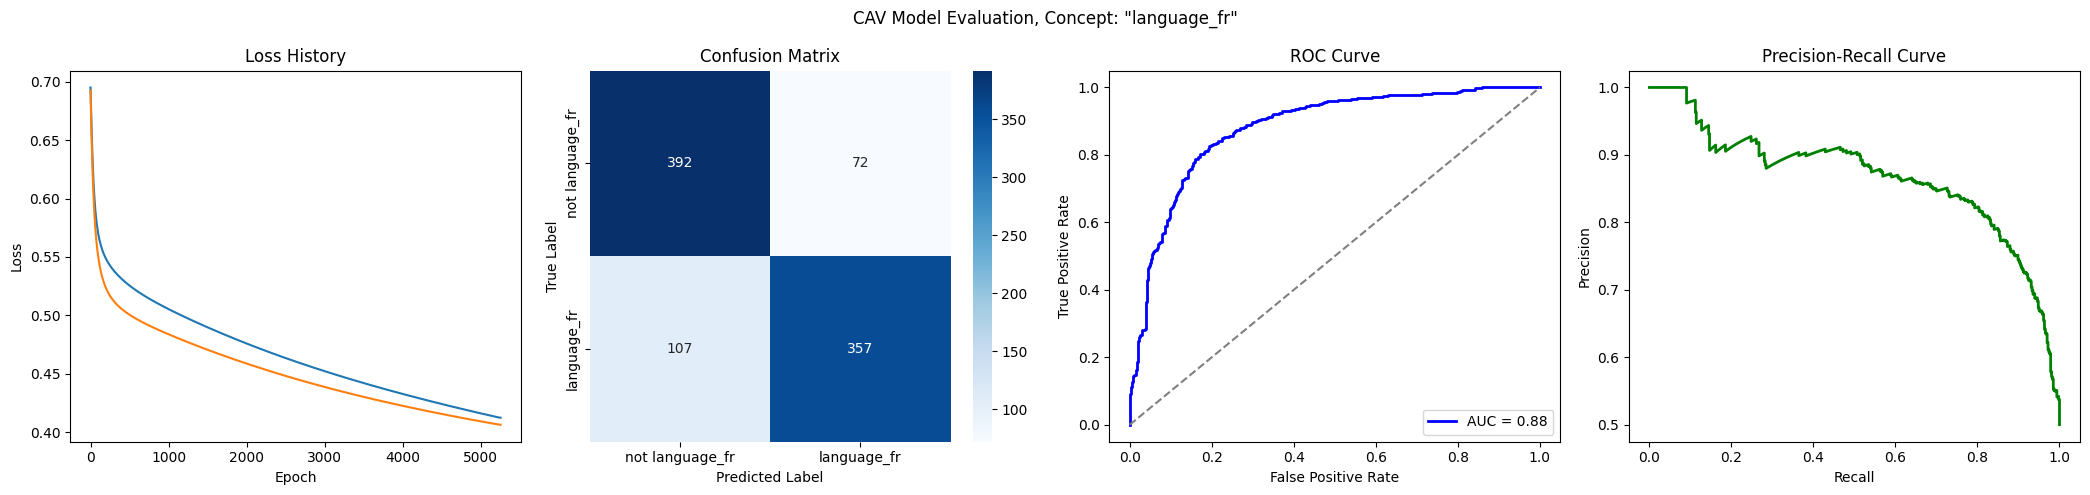


Fitting project: language_it for encoder: mert_v1_95m
Training sample size: 2595
Validation sample size: 289
Test sample size: 594
Epoch 1/10000
Epoch 1 Train Loss: 0.6919
Epoch 1 Validation Loss: 0.6842
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5232
Epoch 101 Validation Loss: 0.5502
Model saved to trainings/language_it/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4803
Epoch 201 Validation Loss: 0.5392
Model saved to trainings/language_it/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.4537
Epoch 301 Validation Loss: 0.5351
Model saved to trainings/language_it/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.4340
Epoch 401 Validation Loss: 0.5325
Model saved to trainings/language_it/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.4184
Epoch 501 Validation Loss: 0.5307
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 531
Loss history saved to trainings/language_it/loss_history.jso

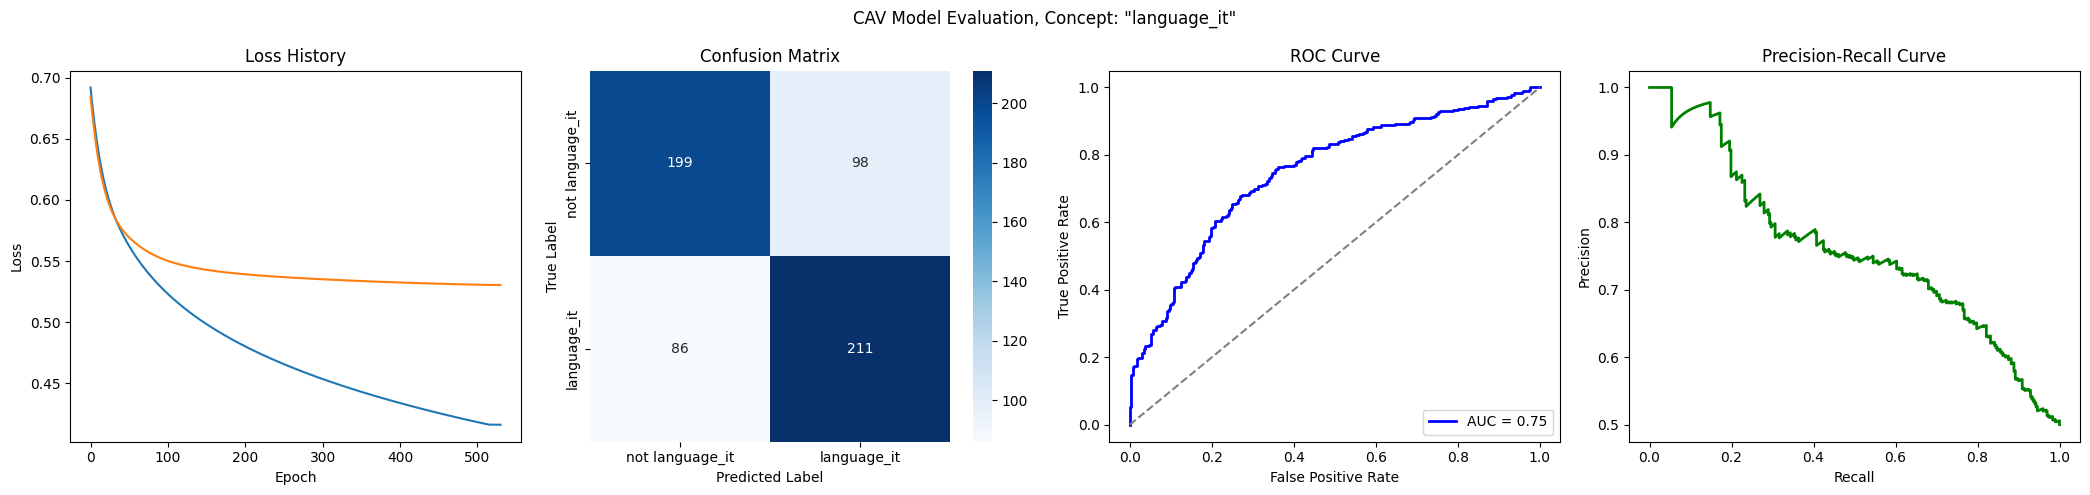


Fitting project: language_it for encoder: whisper_large_v2
Training sample size: 2595
Validation sample size: 289
Test sample size: 594
Epoch 1/10000
Epoch 1 Train Loss: 0.6933
Epoch 1 Validation Loss: 0.6517
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0643
Epoch 101 Validation Loss: 0.0547
Model saved to trainings/language_it/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0408
Epoch 201 Validation Loss: 0.0314
Model saved to trainings/language_it/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0319
Epoch 301 Validation Loss: 0.0243
Model saved to trainings/language_it/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0266
Epoch 401 Validation Loss: 0.0213
Model saved to trainings/language_it/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0228
Epoch 501 Validation Loss: 0.0199
Model saved to trainings/language_it/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0198
Epoch 601 Validation Loss: 0.0194
Mode

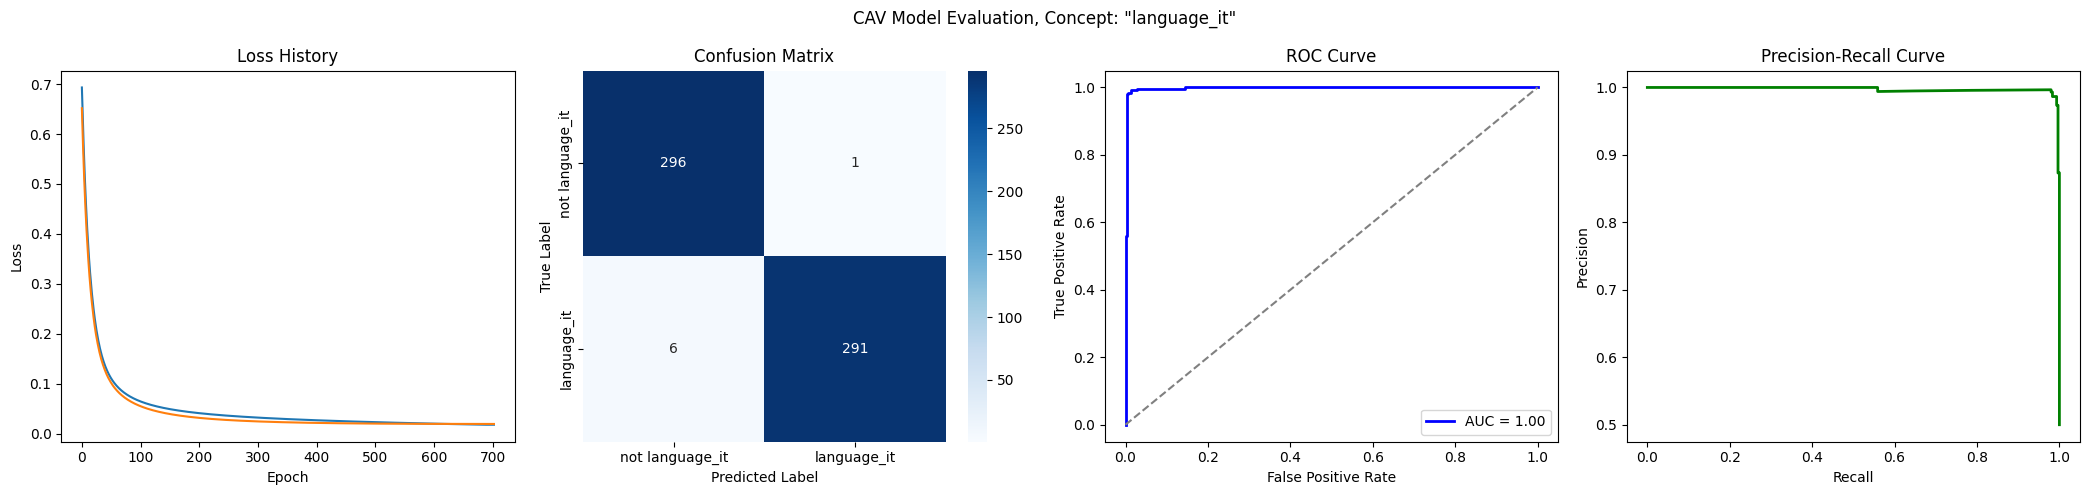


Fitting project: language_it for encoder: muq_large_msd
Training sample size: 2595
Validation sample size: 289
Test sample size: 594
Epoch 1/10000
Epoch 1 Train Loss: 0.7017
Epoch 1 Validation Loss: 0.6801
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.3409
Epoch 101 Validation Loss: 0.4037
Model saved to trainings/language_it/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2849
Epoch 201 Validation Loss: 0.3769
Model saved to trainings/language_it/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.2527
Epoch 301 Validation Loss: 0.3633
Model saved to trainings/language_it/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2301
Epoch 401 Validation Loss: 0.3568
Model saved to trainings/language_it/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2134
Epoch 501 Validation Loss: 0.3546
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 512
Loss history saved to trainings/language_it/loss_history.j

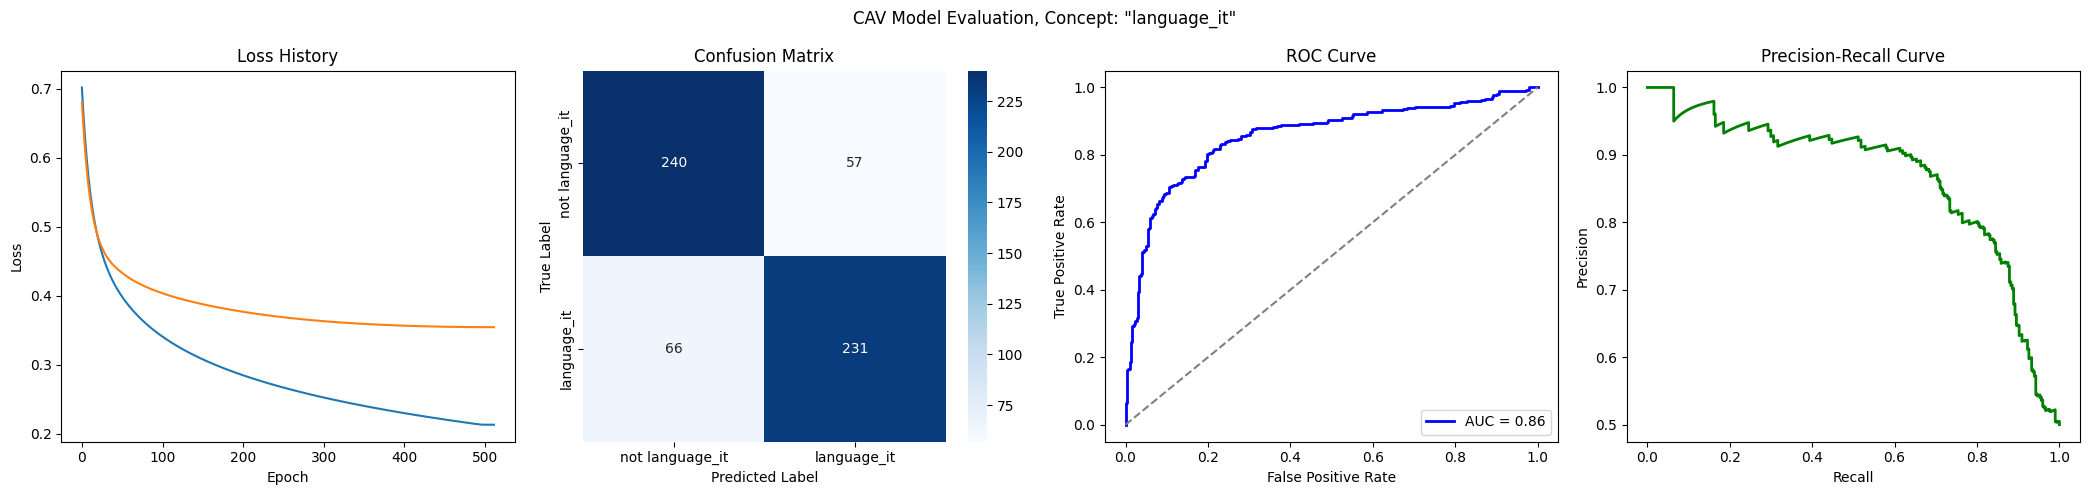


Fitting project: language_it for encoder: muq_mulan_large
Training sample size: 2595
Validation sample size: 289
Test sample size: 594
Epoch 1/10000
Epoch 1 Train Loss: 0.6935
Epoch 1 Validation Loss: 0.6911
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5785
Epoch 101 Validation Loss: 0.5629
Model saved to trainings/language_it/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5484
Epoch 201 Validation Loss: 0.5298
Model saved to trainings/language_it/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5335
Epoch 301 Validation Loss: 0.5147
Model saved to trainings/language_it/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5239
Epoch 401 Validation Loss: 0.5052
Model saved to trainings/language_it/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5169
Epoch 501 Validation Loss: 0.4984
Model saved to trainings/language_it/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5113
Epoch 601 Validation Loss: 0.4933
Model

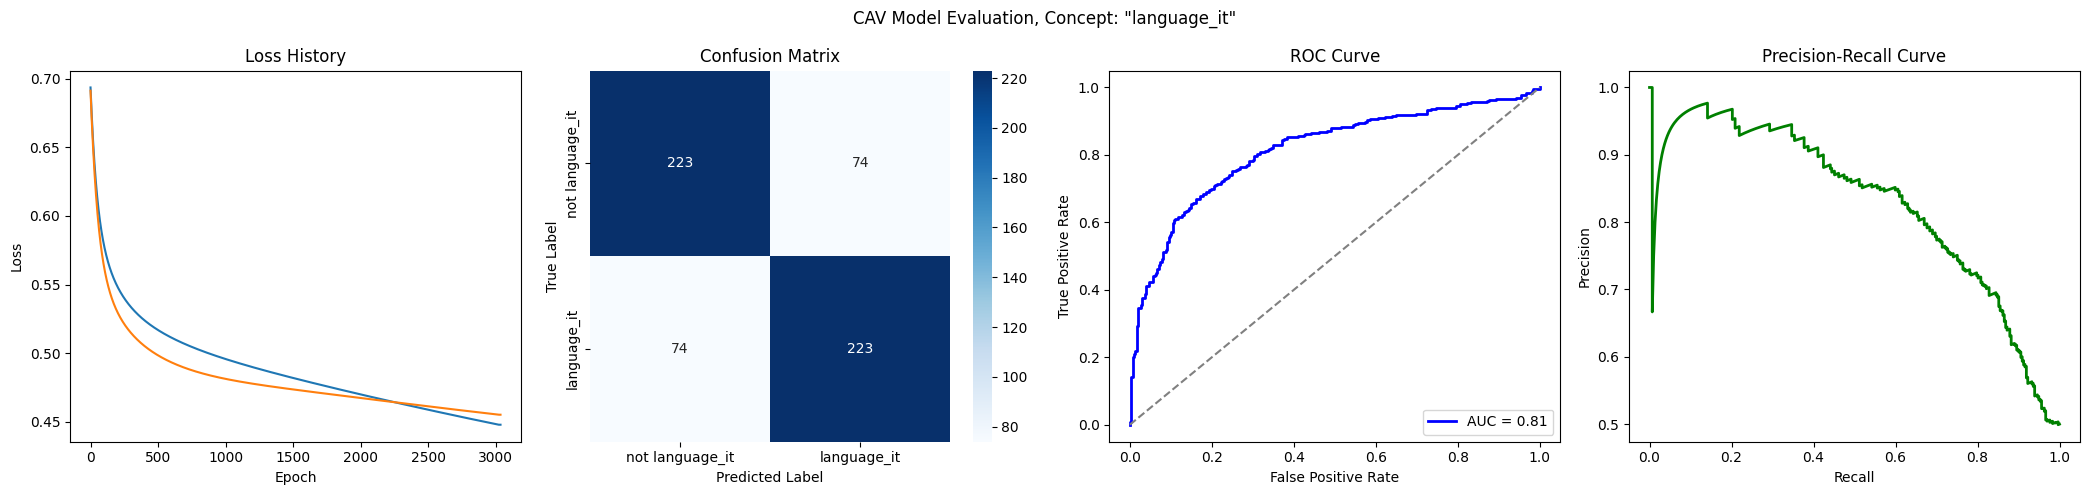


Fitting project: language_ja for encoder: mert_v1_95m
Training sample size: 874
Validation sample size: 98
Test sample size: 544
Epoch 1/10000
Epoch 1 Train Loss: 0.7059
Epoch 1 Validation Loss: 0.6841
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4569
Epoch 101 Validation Loss: 0.5057
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3754
Epoch 201 Validation Loss: 0.4470
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3238
Epoch 301 Validation Loss: 0.4143
Model saved to trainings/language_ja/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2869
Epoch 401 Validation Loss: 0.3946
Model saved to trainings/language_ja/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2585
Epoch 501 Validation Loss: 0.3822
Model saved to trainings/language_ja/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2357
Epoch 601 Validation Loss: 0.3745
Model saved

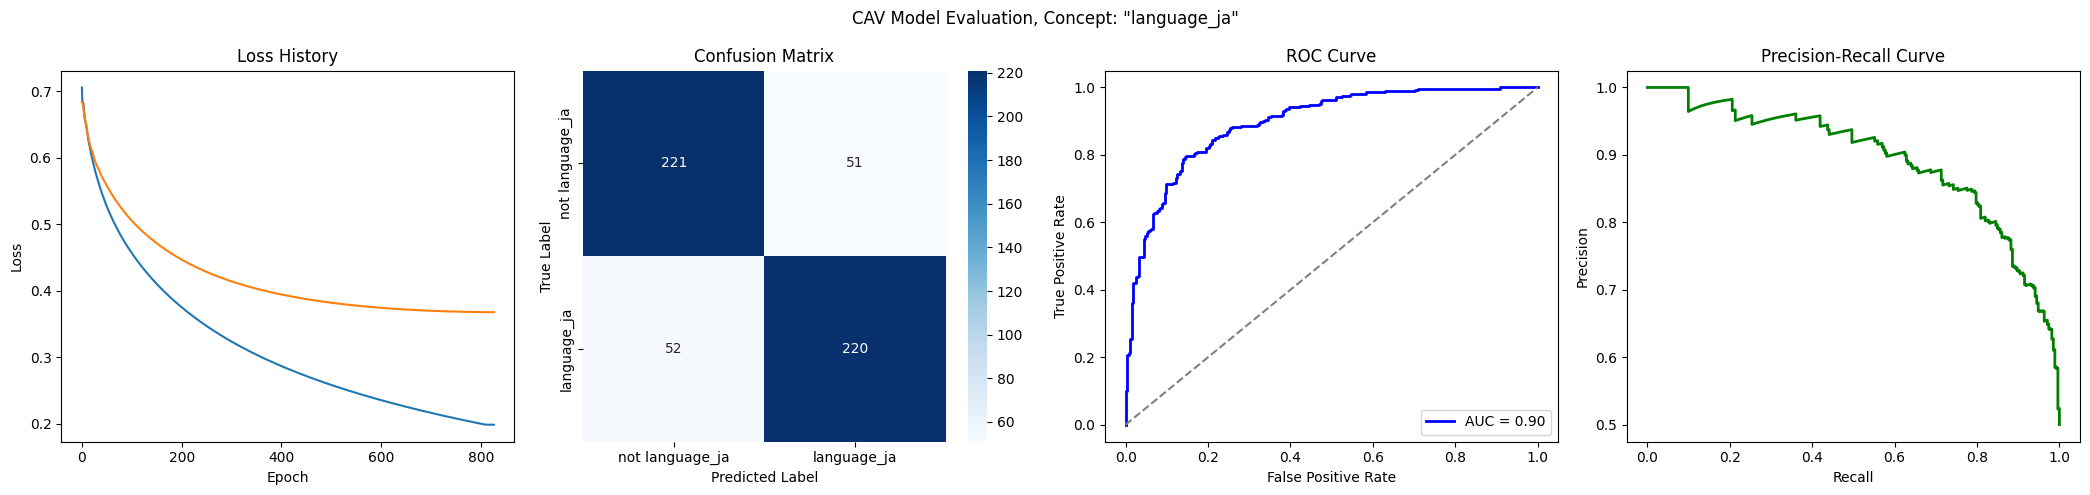


Fitting project: language_ja for encoder: whisper_large_v2
Training sample size: 874
Validation sample size: 98
Test sample size: 544
Epoch 1/10000
Epoch 1 Train Loss: 0.6786
Epoch 1 Validation Loss: 0.6230
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0692
Epoch 101 Validation Loss: 0.0273
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0448
Epoch 201 Validation Loss: 0.0169
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0313
Epoch 301 Validation Loss: 0.0133
Model saved to trainings/language_ja/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0230
Epoch 401 Validation Loss: 0.0112
Model saved to trainings/language_ja/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0176
Epoch 501 Validation Loss: 0.0098
Model saved to trainings/language_ja/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0139
Epoch 601 Validation Loss: 0.0089
Model 

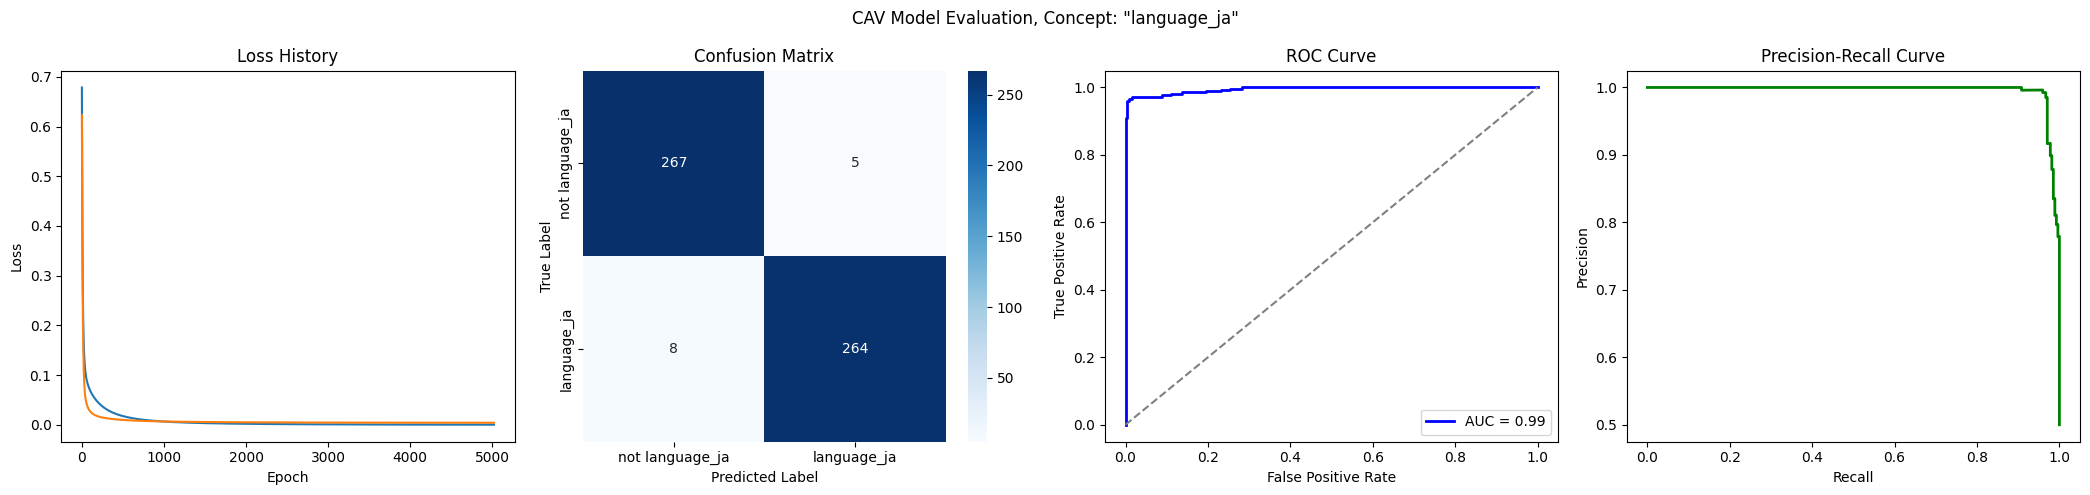


Fitting project: language_ja for encoder: muq_large_msd
Training sample size: 874
Validation sample size: 98
Test sample size: 544
Epoch 1/10000
Epoch 1 Train Loss: 0.6952
Epoch 1 Validation Loss: 0.6474
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.1741
Epoch 101 Validation Loss: 0.2169
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.1153
Epoch 201 Validation Loss: 0.1959
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 271
Loss history saved to trainings/language_ja/loss_history.json


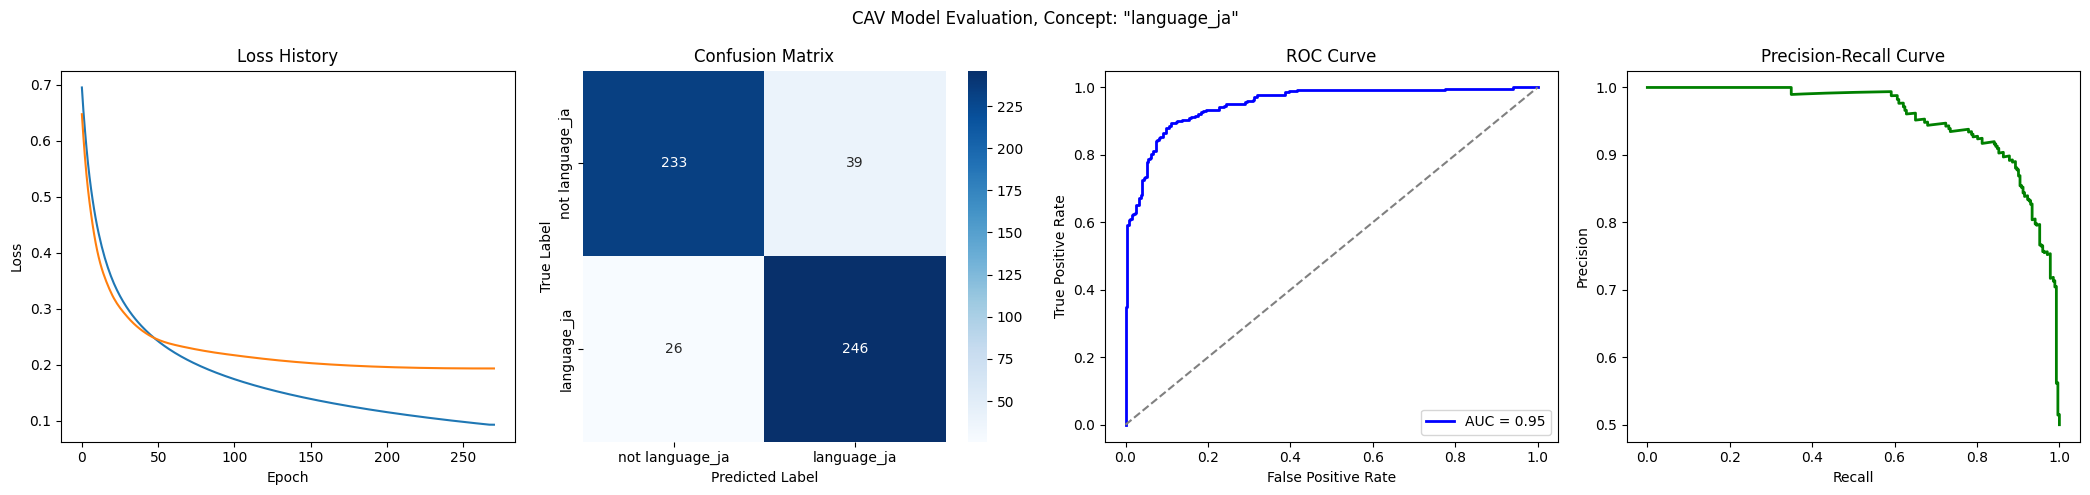


Fitting project: language_ja for encoder: muq_mulan_large
Training sample size: 874
Validation sample size: 98
Test sample size: 544
Epoch 1/10000
Epoch 1 Train Loss: 0.6933
Epoch 1 Validation Loss: 0.6898
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4787
Epoch 101 Validation Loss: 0.4808
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4112
Epoch 201 Validation Loss: 0.4181
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3793
Epoch 301 Validation Loss: 0.3921
Model saved to trainings/language_ja/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.3606
Epoch 401 Validation Loss: 0.3792
Model saved to trainings/language_ja/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.3481
Epoch 501 Validation Loss: 0.3719
Model saved to trainings/language_ja/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.3389
Epoch 601 Validation Loss: 0.3674
Model s

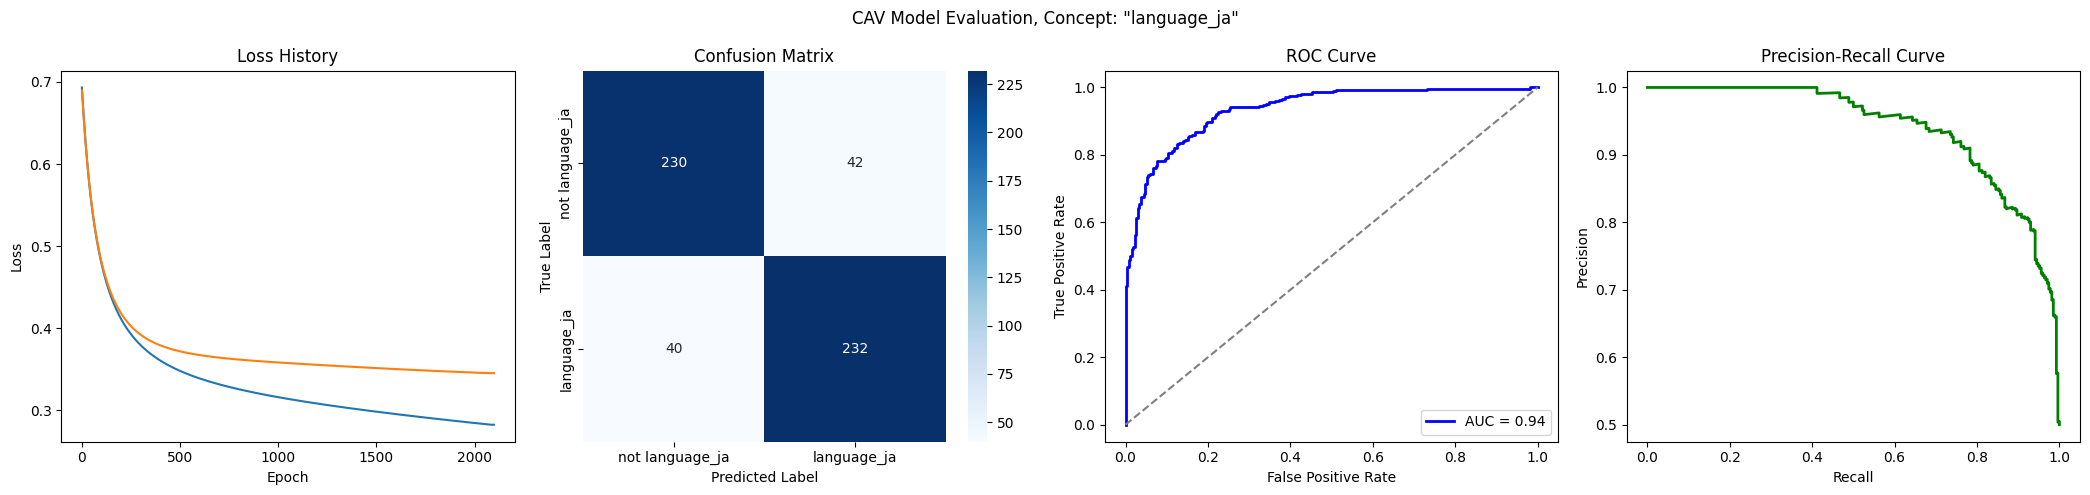


Fitting project: language_pt for encoder: mert_v1_95m
Training sample size: 361
Validation sample size: 41
Test sample size: 686
Epoch 1/10000
Epoch 1 Train Loss: 0.6966
Epoch 1 Validation Loss: 0.6937
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4384
Epoch 101 Validation Loss: 0.5702
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3407
Epoch 201 Validation Loss: 0.5537
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 223
Loss history saved to trainings/language_pt/loss_history.json


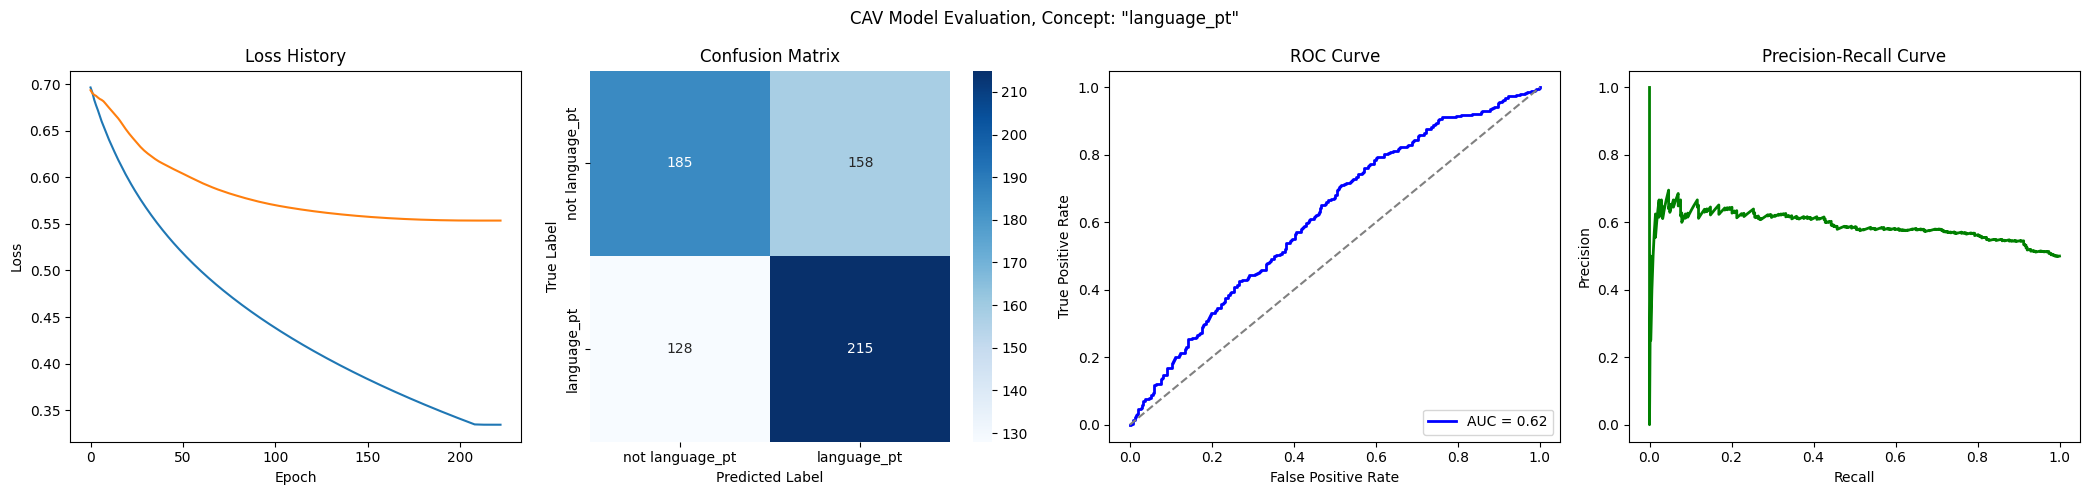


Fitting project: language_pt for encoder: whisper_large_v2
Training sample size: 361
Validation sample size: 41
Test sample size: 686
Epoch 1/10000
Epoch 1 Train Loss: 0.6931
Epoch 1 Validation Loss: 0.6583
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0559
Epoch 101 Validation Loss: 0.0664
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0272
Epoch 201 Validation Loss: 0.0461
Model saved to trainings/language_pt/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0159
Epoch 301 Validation Loss: 0.0389
Model saved to trainings/language_pt/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0105
Epoch 401 Validation Loss: 0.0349
Model saved to trainings/language_pt/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0076
Epoch 501 Validation Loss: 0.0323
Model saved to trainings/language_pt/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0058
Epoch 601 Validation Loss: 0.0305
Model 

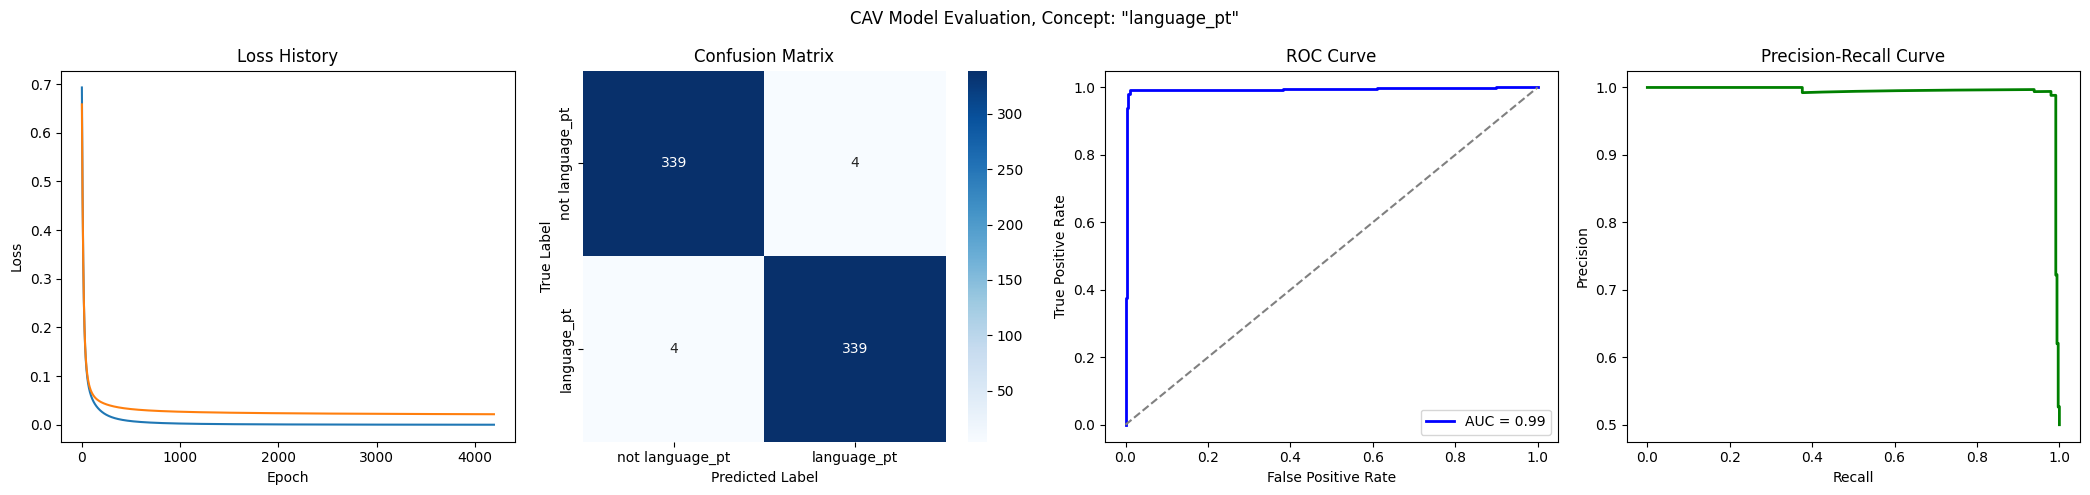


Fitting project: language_pt for encoder: muq_large_msd
Training sample size: 361
Validation sample size: 41
Test sample size: 686
Epoch 1/10000
Epoch 1 Train Loss: 0.6924
Epoch 1 Validation Loss: 0.6817
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.1949
Epoch 101 Validation Loss: 0.3626
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 198
Loss history saved to trainings/language_pt/loss_history.json


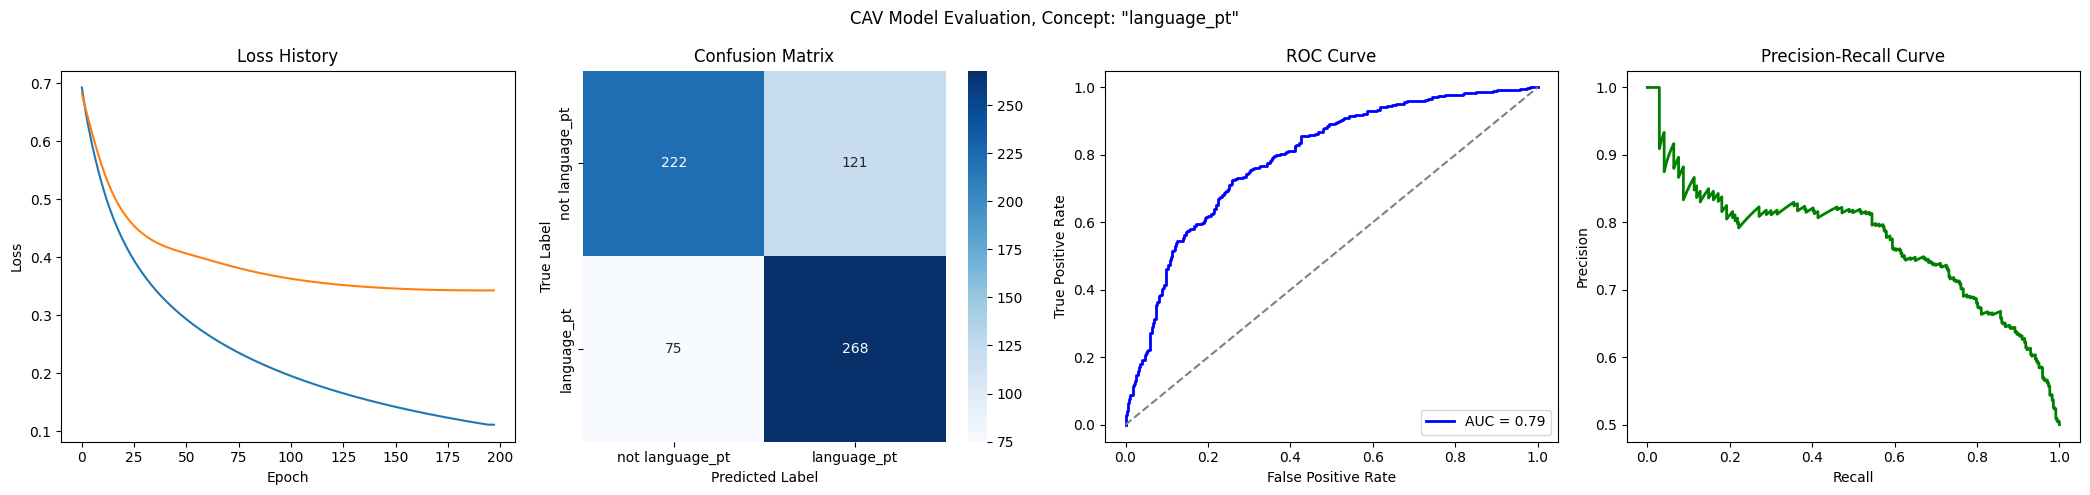


Fitting project: language_pt for encoder: muq_mulan_large
Training sample size: 361
Validation sample size: 41
Test sample size: 686
Epoch 1/10000
Epoch 1 Train Loss: 0.6914
Epoch 1 Validation Loss: 0.6900
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5419
Epoch 101 Validation Loss: 0.5505
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4978
Epoch 201 Validation Loss: 0.5224
Model saved to trainings/language_pt/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.4746
Epoch 301 Validation Loss: 0.5155
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 356
Loss history saved to trainings/language_pt/loss_history.json


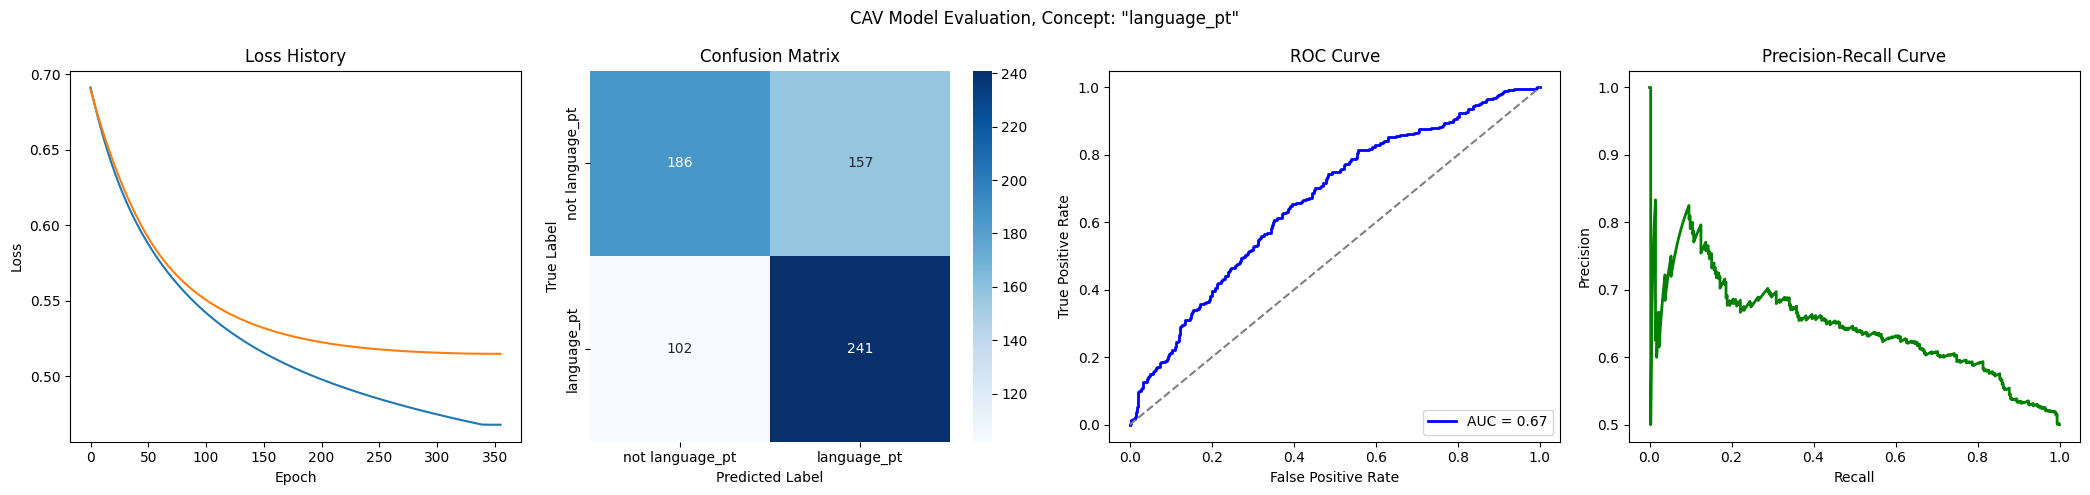

In [ ]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    training_sample_count = int(len(df) * train_val_split)
    validation_sample_count = len(df) - training_sample_count

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    test_dataloader = create_in_memory_dataloader(df_test)

    print(f"Training sample size: {training_sample_count}")
    print(f"Validation sample size: {validation_sample_count}")
    print(f"Test sample size: {len(df_test)}")

    cav_vector, evaluation_metric, bias = train_one_cav(
        random_state=0,
        df=df,
        project_name=project_name,
        training_sample_count=training_sample_count,
        # training_sample_size=training_sample_count,
        validation_sample_count=validation_sample_count,
        epochs=epochs,
        learning_rate=learning_rate,
        embedding_dim=embedding_dim,
        dropout_rate=dropout_rate,
        # test_dataloader=test_dataloader,
        df_test=df_test,
        # plot_evaluation=True,
    )

    store_cav_vector_array(
        bias,
        f"cav_bias_full_{project_name}.npy",
        encoder_id,
        project_name,
    )

    store_cav_vector_array(
        cav_vector,
        f"cav_full_{project_name}.npy",
        encoder_id,
        project_name,
    )
    store_evaluation_metrics(
        evaluation_metric,
        f"evaluation_metrics_full_{project_name}.json",
        encoder_id,
        project_name,
    )

In [ ]:
import pandas as pd

pd.read_pickle("/tmp/load_df_and_embeddings_gender_female_test_muq_mulan_large.pkl")

song_id      genre language release_date  artist_id  gender  \
0      756810782        pop       en   2019-09-20     3004.0  female   
1      483565162        pop       it   2018-04-13     3656.0  female   
2      802272362        pop       en   2019-11-15     1948.0  female   
3      781952492        pop       en   2019-10-25     1348.0  female   
4      976808732        pop       ja   2017-12-22       76.0  female   
...          ...        ...      ...          ...        ...     ...   
3151   374258681  christian       en          NaN        NaN    male   
3152  1462991592  christian       pt   2019-12-27     3241.0    male   
3153   405670622  christian       en          NaN        NaN    male   
3154   454844262  christian       en          NaN        NaN    male   
3155  1462991512  christian       pt   2019-12-27     3241.0    male   

      birth_year country_source_1 country_source_2  singer_age  \
0         1989.0               US               US        30.0   
1         1999.0              NaN               IT        19.0   
2         1981.0              NaN               GR        38.0   
3         1992.0              NaN               GB        27.0   
4         1994.0              NaN              NaN        23.0   
...          ...              ...              ...         ...   
3151         NaN              NaN              NaN         NaN   
3152      1976.0              NaN               BR        43.0   
3153         NaN              NaN              NaN         NaN   
3154         NaN              NaN              NaN         NaN   
3155      1976.0              NaN               BR        43.0   

      singer_age_decade  target  \
0                  30.0       1   
1                  10.0       1   
2                  30.0       1   
3                  20.0       1   
4                  20.0       1   
...                 ...     ...   
3151                NaN       0   
3152               40.0       0   
3153                NaN       0   
3154                NaN       0   
3155               40.0       0   

                                              embedding  
0     [-0.04360929876565933, 0.011355760507285595, -...  
1     [-0.018807586282491684, 0.08948598802089691, -...  
2     [-0.024592235684394836, 0.07943738996982574, -...  
3     [-0.03340607136487961, 0.06097953021526337, -0...  
4     [0.02196037396788597, -0.016869274899363518, 0...  
...                                                 ...  
3151  [-0.018319185823202133, 0.03475680202245712, -...  
3152  [-0.04005713388323784, -0.069559246301651, -0....  
3153  [-0.08321544528007507, 0.029650434851646423, -...  
3154  [-0.016894400119781494, 0.012948542833328247, ...  
3155  [-0.0028563623782247305, 0.014932004734873772,...  

[3156 rows x 13 columns]